File for Data Cleaning and Initial Plotting of Variables

# PPOL 5203 Final Project

## 1. Import Data and Clean Columns

In [2]:
#!pip install openpyxl

In [1]:
import pandas as pd
import os
import openpyxl

In [2]:
pwd

'/Users/katharynloweth/Desktop/Data_Science_I_Fall2023/PPOL5203_FinalProject/Python_code'

In [3]:
#changing path so that we can open files from the orig_data folder
#KL: when i re-run code i keep getting errors when we start to switch directories. Can we work from the main 
#final project folder and code the file paths from there?



os.chdir("../")
#os.chdir('Datasets/Orig_Data')
#os.chdir('PPOL5203_FinalProject')

In [5]:
# import County Health Data

countyhealthcols_1 = ['FIPS', 'State', 'County', 'Life Expectancy', 'Age-Adjusted Death Rate', '% Frequent Physical Distress', '% Frequent Mental Distress', 
                 '% Less than 18 Years of Age','% 65 and Over','% Non-Hispanic White','% Female','% Rural']

County_Health_xl = pd.read_excel("Datasets/Orig_Data/2023_County_Health_Rankings_Data.xlsx", sheet_name = ['Additional Measure Data'],skiprows = 1, usecols = countyhealthcols_1)



In [6]:
# subset the dictionary provided by the sheet needed and save as a new dataframe
County_Health_Addl_Measures = County_Health_xl['Additional Measure Data']

In [7]:
County_Health_Addl_Measures.rename(columns=lambda x: x.replace(" ", "_").replace("%", "Percent"), inplace=True)

In [8]:
County_Health_Addl_Measures.head()

FIPS    State   County  Life_Expectancy  Age-Adjusted_Death_Rate  \
0  1000  Alabama      NaN        74.835949               499.868550   
1  1001  Alabama  Autauga        76.585650               427.073326   
2  1003  Alabama  Baldwin        77.724729               381.702031   
3  1005  Alabama  Barbour        72.867210               589.566095   
4  1007  Alabama     Bibb        73.609363               567.508146   

   Percent_Frequent_Physical_Distress  Percent_Frequent_Mental_Distress  \
0                           11.077397                         16.484296   
1                           10.700000                         16.200000   
2                            9.900000                         16.100000   
3                           14.900000                         18.000000   
4                           12.700000                         17.400000   

   Percent_Less_than_18_Years_of_Age  Percent_65_and_Over  \
0                          22.267448            17.635688   
1                          23.406380            16.048735   
2                          21.218250            21.469824   
3                          20.549591            19.976767   
4                          20.118343            16.737109   

   Percent_Non-Hispanic_White  Percent_Female  Percent_Rural  
0                   64.877099       51.425422      40.963183  
1                   72.454522       51.378289      42.002162  
2                   83.148763       51.347715      42.279099  
3                   45.305240       46.703253      67.789635  
4                   73.564088       46.015927      68.352607

In [9]:
countyhealthcols_2 = ['FIPS','% Fair or Poor Health', 'Average Number of Physically Unhealthy Days', 'Average Number of Mentally Unhealthy Days', '# Primary Care Physicians','Primary Care Physicians Rate',
                 'Primary Care Physicians Ratio', '# Dentists', 'Dentist Rate','Dentist Ratio', 'Average Daily PM2.5', 'Presence of Water Violation', '# Mental Health Providers','Mental Health Provider Rate','Mental Health Provider Ratio']

County_Health_xl_ranked_data = pd.read_excel("Datasets/Orig_Data/2023_County_Health_Rankings_Data.xlsx", sheet_name = ['Ranked Measure Data'],skiprows = 1, usecols = countyhealthcols_2)




In [10]:
# subset the dictionary provided by the sheet needed and save as a new dataframe
County_Health_Ranked_Measures = County_Health_xl_ranked_data['Ranked Measure Data']

In [11]:
# clean column names
County_Health_Ranked_Measures.rename(columns=lambda x: x.replace(" ", "_").replace("%", "Percent").replace("#", "Number"), inplace=True)

# Do we want to convert percents to decimals?
# Do we want the ratios for dentist, primary care, mental health? 

In [12]:
County_Health_Ranked_Measures.head()

FIPS  Percent_Fair_or_Poor_Health  \
0  1000                         18.9   
1  1001                         16.9   
2  1003                         14.9   
3  1005                         27.5   
4  1007                         21.6   

   Average_Number_of_Physically_Unhealthy_Days  \
0                                     3.482416   
1                                     3.432211   
2                                     3.276177   
3                                     4.605432   
4                                     4.012182   

   Average_Number_of_Mentally_Unhealthy_Days  Number_Primary_Care_Physicians  \
0                                   5.073277                          3238.0   
1                                   4.797351                            25.0   
2                                   4.753750                           150.0   
3                                   4.954855                             8.0   
4                                   5.364779                            14.0   

   Primary_Care_Physicians_Rate Primary_Care_Physicians_Ratio  \
0                      65.79252                        1520:1   
1                      44.52756                        2246:1   
2                      65.42019                        1529:1   
3                      32.53487                        3074:1   
4                      63.24539                        1581:1   

   Number_Dentists  Dentist_Rate Dentist_Ratio  \
0           2454.0      48.69166        2054:1   
1             19.0      32.15162        3110:1   
2            114.0      47.64014        2099:1   
3              8.0      32.04615        3121:1   
4              6.0      26.69395        3746:1   

   Number_Mental_Health_Providers  Mental_Health_Provider_Rate  \
0                          6321.0                    125.41973   
1                            21.0                     35.53600   
2                           250.0                    104.47399   
3                             6.0                     24.03461   
4                             9.0                     40.04093   

  Mental_Health_Provider_Ratio  Average_Daily_PM2.5  \
0                        797:1                  9.3   
1                       2814:1                 10.0   
2                        957:1                  7.6   
3                       4161:1                  9.4   
4                       2497:1                  9.8   

  Presence_of_Water_Violation  
0                         NaN  
1                          No  
2                         Yes  
3                         Yes  
4                          No

In [13]:
#import NRI data 

NRIcols = ['STATEABBRV','STCOFIPS', 'POPULATION','AREA',
           'RISK_SCORE','RISK_RATNG','EAL_SCORE','EAL_RATNG','SOVI_SCORE','SOVI_RATNG','RESL_SCORE','RESL_RATNG']

NRI_df = pd.read_csv("Datasets/Orig_Data/NRI_Table_Counties/NRI_Table_Counties.csv", usecols = NRIcols)

In [14]:
NRI_df.rename(columns = {'STCOFIPS': 'FIPS'}, inplace = True)

In [15]:
NRI_df.head()

STATEABBRV  FIPS  POPULATION         AREA  RISK_SCORE  EAL_SCORE  \
0         AL  1001       58764   610.470508   49.220490  50.943980   
1         AL  1003      231365  2047.738775   97.709195  98.235840   
2         AL  1005       25160   913.646511   56.188355  44.877747   
3         AL  1007       22239   632.486798   32.484887  30.485918   
4         AL  1009       58992   657.196555   65.128858  63.633550   

         EAL_RATNG  SOVI_SCORE           SOVI_RATNG  RESL_SCORE  \
0         Very Low   51.299999  Relatively Moderate   51.810001   
1  Relatively High   31.030001       Relatively Low   86.120003   
2         Very Low   99.269997            Very High    6.240000   
3         Very Low   80.779999            Very High   19.730000   
4   Relatively Low   51.369999  Relatively Moderate   22.820000   

            RESL_RATNG  
0  Relatively Moderate  
1            Very High  
2             Very Low  
3             Very Low  
4       Relatively Low

In [16]:
#os.chdir('../')


In [17]:
pwd


'/Users/katharynloweth/Desktop/Data_Science_I_Fall2023/PPOL5203_FinalProject'

In [18]:
#import Places data 

PlacesCols = ['StateAbbr', 'StateDesc', 'LocationName', 'LocationID', 'Geolocation']


Places_df = pd.read_csv("Datasets/Orig_Data/PLACES__Local_Data_for_Better_Health__County_Data_2023_release.csv", usecols = PlacesCols)


In [19]:
#I moved this code later on so that it is in the final dataset
#Places_df['County_State'] = Places_df.LocationName + ", " + Places_df.StateAbbr

In [20]:
Places_df.head()

StateAbbr StateDesc LocationName  LocationID                     Geolocation
0        GA   Georgia         Ware       13299   POINT (-82.4215072 31.050881)
1        IN   Indiana         Ohio       18115   POINT (-84.9642994 38.940527)
2        IN   Indiana         Owen       18119  POINT (-86.8388453 39.3173394)
3        IA      Iowa         Iowa       19095  POINT (-92.0591226 41.6839184)
4        IA      Iowa       Marion       19125  POINT (-93.0938678 41.3314327)

In [21]:
# Create a new column for the county and state so that we can merge later
# Confirm - this data set does not include FIPS?
#KL -changing group to group by the FIPS (in this case called LocationID)
Places_df_grouped = pd.DataFrame(Places_df.groupby('LocationID', as_index = False)['Geolocation'].first())
Places_df_grouped.head()

LocationID                     Geolocation
0          59                            None
1        1001  POINT (-86.6464395 32.5322367)
2        1003  POINT (-87.7460666 30.6592183)
3        1005  POINT (-85.4051035 31.8702531)
4        1007  POINT (-87.1271475 33.0158929)

## 2. Merge Datasets together by FIPS

In [22]:
# To see which data set has the most information on FIPS

print( NRI_df.shape)
print( County_Health_Ranked_Measures.shape)
print( County_Health_Addl_Measures.shape)
print( Places_df_grouped.shape)

(3231, 11)
(3193, 15)
(3193, 12)
(3144, 2)


In [23]:
# Do we want to join on the left or outer? Outer would mean that we don't have data for NRI for those FIPS that are coming from the county health data

Merged_County_Data_Ranked = pd.merge(NRI_df, County_Health_Ranked_Measures, how = 'left', on = 'FIPS')

In [24]:
Merged_County_Data_Ranked.shape

(3231, 25)

In [25]:
Merged_County_Data_Ranked.head()

STATEABBRV  FIPS  POPULATION         AREA  RISK_SCORE  EAL_SCORE  \
0         AL  1001       58764   610.470508   49.220490  50.943980   
1         AL  1003      231365  2047.738775   97.709195  98.235840   
2         AL  1005       25160   913.646511   56.188355  44.877747   
3         AL  1007       22239   632.486798   32.484887  30.485918   
4         AL  1009       58992   657.196555   65.128858  63.633550   

         EAL_RATNG  SOVI_SCORE           SOVI_RATNG  RESL_SCORE  ...  \
0         Very Low   51.299999  Relatively Moderate   51.810001  ...   
1  Relatively High   31.030001       Relatively Low   86.120003  ...   
2         Very Low   99.269997            Very High    6.240000  ...   
3         Very Low   80.779999            Very High   19.730000  ...   
4   Relatively Low   51.369999  Relatively Moderate   22.820000  ...   

  Primary_Care_Physicians_Rate  Primary_Care_Physicians_Ratio  \
0                     44.52756                         2246:1   
1                     65.42019                         1529:1   
2                     32.53487                         3074:1   
3                     63.24539                         1581:1   
4                     20.73291                         4823:1   

   Number_Dentists  Dentist_Rate  Dentist_Ratio  \
0             19.0      32.15162         3110:1   
1            114.0      47.64014         2099:1   
2              8.0      32.04615         3121:1   
3              6.0      26.69395         3746:1   
4             10.0      16.93738         5904:1   

   Number_Mental_Health_Providers Mental_Health_Provider_Rate  \
0                            21.0                    35.53600   
1                           250.0                   104.47399   
2                             6.0                    24.03461   
3                             9.0                    40.04093   
4                            12.0                    20.32486   

   Mental_Health_Provider_Ratio  Average_Daily_PM2.5  \
0                        2814:1                 10.0   
1                         957:1                  7.6   
2                        4161:1                  9.4   
3                        2497:1                  9.8   
4                        4920:1                  9.6   

  Presence_of_Water_Violation  
0                          No  
1                         Yes  
2                         Yes  
3                          No  
4                          No  

[5 rows x 25 columns]

In [26]:
Merged_County_Data2 = pd.merge(NRI_df, County_Health_Ranked_Measures, how = 'outer', on = 'FIPS')
Merged_County_Data2.shape

(3283, 25)

In [27]:
# going with the left join for now

#merge the additional measures with the previously merged data set
Merged_County_Data_Addl_Measures = pd.merge(Merged_County_Data_Ranked, County_Health_Addl_Measures, how = 'left', on = 'FIPS')
Merged_County_Data_Addl_Measures.shape

(3231, 36)

In [28]:
Merged_County_Data = pd.merge(Merged_County_Data_Addl_Measures,
         Places_df_grouped,
         how="outer",
         left_on = "FIPS",  
         right_on="LocationID")

Merged_County_Data.head()

#print(Merged_County_Data.shape)

STATEABBRV    FIPS  POPULATION         AREA  RISK_SCORE  EAL_SCORE  \
0         AL  1001.0     58764.0   610.470508   49.220490  50.943980   
1         AL  1003.0    231365.0  2047.738775   97.709195  98.235840   
2         AL  1005.0     25160.0   913.646511   56.188355  44.877747   
3         AL  1007.0     22239.0   632.486798   32.484887  30.485918   
4         AL  1009.0     58992.0   657.196555   65.128858  63.633550   

         EAL_RATNG  SOVI_SCORE           SOVI_RATNG  RESL_SCORE  ...  \
0         Very Low   51.299999  Relatively Moderate   51.810001  ...   
1  Relatively High   31.030001       Relatively Low   86.120003  ...   
2         Very Low   99.269997            Very High    6.240000  ...   
3         Very Low   80.779999            Very High   19.730000  ...   
4   Relatively Low   51.369999  Relatively Moderate   22.820000  ...   

  Age-Adjusted_Death_Rate  Percent_Frequent_Physical_Distress  \
0              427.073326                                10.7   
1              381.702031                                 9.9   
2              589.566095                                14.9   
3              567.508146                                12.7   
4              532.836482                                11.9   

   Percent_Frequent_Mental_Distress  Percent_Less_than_18_Years_of_Age  \
0                              16.2                          23.406380   
1                              16.1                          21.218250   
2                              18.0                          20.549591   
3                              17.4                          20.118343   
4                              17.4                          23.053471   

   Percent_65_and_Over  Percent_Non-Hispanic_White Percent_Female  \
0            16.048735                   72.454522      51.378289   
1            21.469824                   83.148763      51.347715   
2            19.976767                   45.305240      46.703253   
3            16.737109                   73.564088      46.015927   
4            18.725970                   86.329839      50.192239   

   Percent_Rural  LocationID                     Geolocation  
0      42.002162      1001.0  POINT (-86.6464395 32.5322367)  
1      42.279099      1003.0  POINT (-87.7460666 30.6592183)  
2      67.789635      1005.0  POINT (-85.4051035 31.8702531)  
3      68.352607      1007.0  POINT (-87.1271475 33.0158929)  
4      89.951502      1009.0    POINT (-86.56644 33.9773575)  

[5 rows x 38 columns]

In [29]:
# create new column for County_State so that we can merge with the Places data set
#Merged_County_Data_Addl_Measures['County_State'] = Merged_County_Data_Addl_Measures['COUNTY'] + ", " + Merged_County_Data_Addl_Measures['STATEABBRV']

In [30]:
# merge the places data set with the rest of the data on the County_state variable
#Merged_County_Data = pd.merge(Merged_County_Data_Addl_Measures, Places_df_grouped, how = 'left', on = 'County_State')

In [31]:
Merged_County_Data['County_State'] = Merged_County_Data.County + ", " + Merged_County_Data.STATEABBRV

Merged_County_Data.head()

STATEABBRV    FIPS  POPULATION         AREA  RISK_SCORE  EAL_SCORE  \
0         AL  1001.0     58764.0   610.470508   49.220490  50.943980   
1         AL  1003.0    231365.0  2047.738775   97.709195  98.235840   
2         AL  1005.0     25160.0   913.646511   56.188355  44.877747   
3         AL  1007.0     22239.0   632.486798   32.484887  30.485918   
4         AL  1009.0     58992.0   657.196555   65.128858  63.633550   

         EAL_RATNG  SOVI_SCORE           SOVI_RATNG  RESL_SCORE  ...  \
0         Very Low   51.299999  Relatively Moderate   51.810001  ...   
1  Relatively High   31.030001       Relatively Low   86.120003  ...   
2         Very Low   99.269997            Very High    6.240000  ...   
3         Very Low   80.779999            Very High   19.730000  ...   
4   Relatively Low   51.369999  Relatively Moderate   22.820000  ...   

  Percent_Frequent_Physical_Distress  Percent_Frequent_Mental_Distress  \
0                               10.7                              16.2   
1                                9.9                              16.1   
2                               14.9                              18.0   
3                               12.7                              17.4   
4                               11.9                              17.4   

   Percent_Less_than_18_Years_of_Age  Percent_65_and_Over  \
0                          23.406380            16.048735   
1                          21.218250            21.469824   
2                          20.549591            19.976767   
3                          20.118343            16.737109   
4                          23.053471            18.725970   

   Percent_Non-Hispanic_White  Percent_Female Percent_Rural  LocationID  \
0                   72.454522       51.378289     42.002162      1001.0   
1                   83.148763       51.347715     42.279099      1003.0   
2                   45.305240       46.703253     67.789635      1005.0   
3                   73.564088       46.015927     68.352607      1007.0   
4                   86.329839       50.192239     89.951502      1009.0   

                      Geolocation County_State  
0  POINT (-86.6464395 32.5322367)  Autauga, AL  
1  POINT (-87.7460666 30.6592183)  Baldwin, AL  
2  POINT (-85.4051035 31.8702531)  Barbour, AL  
3  POINT (-87.1271475 33.0158929)     Bibb, AL  
4    POINT (-86.56644 33.9773575)   Blount, AL  

[5 rows x 39 columns]

In [32]:
Merged_County_Data.County.isna().value_counts()

Merged_County_Data[Merged_County_Data.County.isna()]

STATEABBRV     FIPS  POPULATION          AREA  RISK_SCORE  EAL_SCORE  \
72           AK   2063.0      7011.0  15296.227862    8.017817   9.068400   
73           AK   2066.0      2596.0  25416.208556    2.036271   1.578459   
3143         AS  60010.0     17658.0    161.791322         NaN  17.146394   
3144         AS  60020.0       852.0    203.525024         NaN   0.247601   
3145         AS  60050.0     31217.0    104.997645         NaN  31.816775   
...         ...      ...         ...           ...         ...        ...   
3227         PR  72153.0     34151.0     69.028903         NaN  81.739400   
3228         VI  78010.0     40913.0    336.008335         NaN  88.300836   
3229         VI  78020.0      3882.0     92.690701         NaN  48.529867   
3230         VI  78030.0     41412.0    311.621622         NaN  90.095946   
3231        NaN      NaN         NaN           NaN         NaN        NaN   

                EAL_RATNG  SOVI_SCORE           SOVI_RATNG  RESL_SCORE  ...  \
72               Very Low   23.520000       Relatively Low   44.270000  ...   
73               Very Low   41.790001  Relatively Moderate   70.809998  ...   
3143             Very Low         NaN     Data Unavailable         NaN  ...   
3144             Very Low         NaN     Data Unavailable         NaN  ...   
3145             Very Low         NaN     Data Unavailable         NaN  ...   
...                   ...         ...                  ...         ...  ...   
3227       Relatively Low   85.959999            Very High         NaN  ...   
3228  Relatively Moderate         NaN     Data Unavailable         NaN  ...   
3229             Very Low         NaN     Data Unavailable         NaN  ...   
3230  Relatively Moderate         NaN     Data Unavailable         NaN  ...   
3231                  NaN         NaN                  NaN         NaN  ...   

     Percent_Frequent_Physical_Distress  Percent_Frequent_Mental_Distress  \
72                                  NaN                               NaN   
73                                  NaN                               NaN   
3143                                NaN                               NaN   
3144                                NaN                               NaN   
3145                                NaN                               NaN   
...                                 ...                               ...   
3227                                NaN                               NaN   
3228                                NaN                               NaN   
3229                                NaN                               NaN   
3230                                NaN                               NaN   
3231                                NaN                               NaN   

      Percent_Less_than_18_Years_of_Age  Percent_65_and_Over  \
72                                  NaN                  NaN   
73                                  NaN                  NaN   
3143                                NaN                  NaN   
3144                                NaN                  NaN   
3145                                NaN                  NaN   
...                                 ...                  ...   
3227                                NaN                  NaN   
3228                                NaN                  NaN   
3229                                NaN                  NaN   
3230                                NaN                  NaN   
3231                                NaN                  NaN   

      Percent_Non-Hispanic_White  Percent_Female Percent_Rural  LocationID  \
72                           NaN             NaN           NaN      2063.0   
73                           NaN             NaN           NaN      2066.0   
3143                         NaN             NaN           NaN         NaN   
3144                         NaN             NaN           NaN         NaN   
3145                         NaN             Na

In [33]:
Merged_County_Data.State.isna().value_counts()

State
False    3141
True       91
Name: count, dtype: int64

In [34]:
Merged_County_Data[Merged_County_Data.STATEABBRV == "AL"]

STATEABBRV    FIPS  POPULATION         AREA  RISK_SCORE  EAL_SCORE  \
0          AL  1001.0     58764.0   610.470508   49.220490  50.943980   
1          AL  1003.0    231365.0  2047.738775   97.709195  98.235840   
2          AL  1005.0     25160.0   913.646511   56.188355  44.877747   
3          AL  1007.0     22239.0   632.486798   32.484887  30.485918   
4          AL  1009.0     58992.0   657.196555   65.128858  63.633550   
..        ...     ...         ...          ...         ...        ...   
62         AL  1125.0    226701.0  1364.876560   87.114222  87.310430   
63         AL  1127.0     65276.0   813.321874   73.337576  69.142680   
64         AL  1129.0     15333.0  1099.555462   58.001909  56.453110   
65         AL  1131.0     10548.0   916.551772   23.003500  16.836893   
66         AL  1133.0     23478.0   638.247221   44.002545  37.883008   

              EAL_RATNG  SOVI_SCORE           SOVI_RATNG  RESL_SCORE  ...  \
0              Very Low   51.299999  Relatively Moderate   51.810001  ...   
1       Relatively High   31.030001       Relatively Low   86.120003  ...   
2              Very Low   99.269997            Very High    6.240000  ...   
3              Very Low   80.779999            Very High   19.730000  ...   
4        Relatively Low   51.369999  Relatively Moderate   22.820000  ...   
..                  ...         ...                  ...         ...  ...   
62  Relatively Moderate   68.199997      Relatively High   69.669998  ...   
63       Relatively Low   68.750000      Relatively High   22.059999  ...   
64       Relatively Low   45.990002  Relatively Moderate   53.720001  ...   
65             Very Low   92.080002            Very High    8.370000  ...   
66             Very Low   68.519997      Relatively High   17.660000  ...   

   Percent_Frequent_Physical_Distress  Percent_Frequent_Mental_Distress  \
0                                10.7                              16.2   
1                                 9.9                              16.1   
2                                14.9                              18.0   
3                                12.7                              17.4   
4                                11.9                              17.4   
..                                ...                               ...   
62                               11.3                              16.9   
63                               12.8                              18.4   
64                               12.9                              17.9   
65                               15.3                              18.7   
66                               13.4                              18.5   

    Percent_Less_than_18_Years_of_Age  Percent_65_and_Over  \
0                           23.406380            16.048735   
1                           21.218250            21.469824   
2                           20.549591            19.976767   
3                           20.118343            16.737109   
4                           23.053471            18.725970   
..                                ...                  ...   
62                          21.137674            14.231279   
63                          22.436669            19.837082   
64                          21.363966            20.122797   
65                          22.783841            21.204289   
66                          20.378826            22.175715   

    Percent_Non-Hispanic_White  Percent_Female Percent_Rural  LocationID  \
0                    72.454522       51.378289     42.002162      1001.0   
1                    83.148763       51.347715     42.279099      1003.0   
2                    45.305240       46.703253     67.789635      1005.0   
3                    73.564088       46.015927     68.352607      1007.0   
4                    86.329839       50.192239     89.951502      1009.0   
..                         ...             ...           ...         ...   
62                   60

In [35]:
# Remove duplicate state and county columns
Merged_County_Data.drop(columns = ['LocationID'], inplace = True)

Merged_County_Data.head()

STATEABBRV    FIPS  POPULATION         AREA  RISK_SCORE  EAL_SCORE  \
0         AL  1001.0     58764.0   610.470508   49.220490  50.943980   
1         AL  1003.0    231365.0  2047.738775   97.709195  98.235840   
2         AL  1005.0     25160.0   913.646511   56.188355  44.877747   
3         AL  1007.0     22239.0   632.486798   32.484887  30.485918   
4         AL  1009.0     58992.0   657.196555   65.128858  63.633550   

         EAL_RATNG  SOVI_SCORE           SOVI_RATNG  RESL_SCORE  ...  \
0         Very Low   51.299999  Relatively Moderate   51.810001  ...   
1  Relatively High   31.030001       Relatively Low   86.120003  ...   
2         Very Low   99.269997            Very High    6.240000  ...   
3         Very Low   80.779999            Very High   19.730000  ...   
4   Relatively Low   51.369999  Relatively Moderate   22.820000  ...   

  Age-Adjusted_Death_Rate  Percent_Frequent_Physical_Distress  \
0              427.073326                                10.7   
1              381.702031                                 9.9   
2              589.566095                                14.9   
3              567.508146                                12.7   
4              532.836482                                11.9   

   Percent_Frequent_Mental_Distress  Percent_Less_than_18_Years_of_Age  \
0                              16.2                          23.406380   
1                              16.1                          21.218250   
2                              18.0                          20.549591   
3                              17.4                          20.118343   
4                              17.4                          23.053471   

   Percent_65_and_Over  Percent_Non-Hispanic_White Percent_Female  \
0            16.048735                   72.454522      51.378289   
1            21.469824                   83.148763      51.347715   
2            19.976767                   45.305240      46.703253   
3            16.737109                   73.564088      46.015927   
4            18.725970                   86.329839      50.192239   

   Percent_Rural                     Geolocation County_State  
0      42.002162  POINT (-86.6464395 32.5322367)  Autauga, AL  
1      42.279099  POINT (-87.7460666 30.6592183)  Baldwin, AL  
2      67.789635  POINT (-85.4051035 31.8702531)  Barbour, AL  
3      68.352607  POINT (-87.1271475 33.0158929)     Bibb, AL  
4      89.951502    POINT (-86.56644 33.9773575)   Blount, AL  

[5 rows x 38 columns]

In [36]:
# create function to classify community type by population of county
# these thresholds come from the CDC urban rural classification report.

def community_type_classification(population):
    '''
    Add description here.
    '''
    if population < 50000:
        return("Rural")
    elif population < 250000:
        return("Small Urban")
    else:
        return("Urban")

In [37]:
# create new column to get community type from the created classification function
Merged_County_Data['Community_Type'] = [community_type_classification(x) for x in Merged_County_Data['POPULATION']]

In [38]:
Merged_County_Data.Community_Type.value_counts()

# Looks like we don't have many urban observations - do we want to include medium in the urban classification?

#KL - if we do cutoff for urban as greater than 250,000 its roughly 250 for urban and 700 for small urban

Community_Type
Rural          2227
Small Urban     726
Urban           279
Name: count, dtype: int64

In [39]:
# Look at the number of NA geolocation rows
Merged_County_Data.Geolocation.isna().value_counts() #only 89 values that don't have geolocations - could be misspellings that we need to look at?

#KL - those with NaN's in the geolocation are US territories -- we can probably remove from the dataset as there is also little information about them in the NRI
Merged_County_Data[Merged_County_Data.Geolocation.isna()]


#removing NaNs for geolocation
Merged_County_Data_clean = Merged_County_Data[Merged_County_Data.Geolocation.isna() == False]

Merged_County_Data_clean.Geolocation.isna().value_counts()


Geolocation
False    3143
Name: count, dtype: int64

In [40]:
#confirming that all of the remaining datasets have information on NRI risk 
#Merged_County_Data_clean.RISK_RATNG.value_counts()

AttributeError: 'DataFrame' object has no attribute 'RISK_RATNG'

In [41]:
# Final data set merged all data sets
Merged_County_Data.columns

Index(['STATEABBRV', 'FIPS', 'POPULATION', 'AREA', 'RISK_SCORE', 'EAL_SCORE',
       'EAL_RATNG', 'SOVI_SCORE', 'SOVI_RATNG', 'RESL_SCORE', 'RESL_RATNG',
       'Percent_Fair_or_Poor_Health',
       'Average_Number_of_Physically_Unhealthy_Days',
       'Average_Number_of_Mentally_Unhealthy_Days',
       'Number_Primary_Care_Physicians', 'Primary_Care_Physicians_Rate',
       'Primary_Care_Physicians_Ratio', 'Number_Dentists', 'Dentist_Rate',
       'Dentist_Ratio', 'Number_Mental_Health_Providers',
       'Mental_Health_Provider_Rate', 'Mental_Health_Provider_Ratio',
       'Average_Daily_PM2.5', 'Presence_of_Water_Violation', 'State', 'County',
       'Life_Expectancy', 'Age-Adjusted_Death_Rate',
       'Percent_Frequent_Physical_Distress',
       'Percent_Frequent_Mental_Distress', 'Percent_Less_than_18_Years_of_Age',
       'Percent_65_and_Over', 'Percent_Non-Hispanic_White', 'Percent_Female',
       'Percent_Rural', 'Geolocation', 'County_State', 'Community_Type'],
      dtype='obj

In [42]:
# create density column
Merged_County_Data_clean['Population_Density'] = Merged_County_Data_clean['POPULATION'] / Merged_County_Data_clean['AREA']

Merged_County_Data_clean.head()

/var/folders/zd/g468sr211nz26mz91q_cxlkr0000gn/T/ipykernel_3392/2988376501.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Merged_County_Data_clean['Population_Density'] = Merged_County_Data_clean['POPULATION'] / Merged_County_Data_clean['AREA']


STATEABBRV    FIPS  POPULATION         AREA  RISK_SCORE  EAL_SCORE  \
0         AL  1001.0     58764.0   610.470508   49.220490  50.943980   
1         AL  1003.0    231365.0  2047.738775   97.709195  98.235840   
2         AL  1005.0     25160.0   913.646511   56.188355  44.877747   
3         AL  1007.0     22239.0   632.486798   32.484887  30.485918   
4         AL  1009.0     58992.0   657.196555   65.128858  63.633550   

         EAL_RATNG  SOVI_SCORE           SOVI_RATNG  RESL_SCORE  ...  \
0         Very Low   51.299999  Relatively Moderate   51.810001  ...   
1  Relatively High   31.030001       Relatively Low   86.120003  ...   
2         Very Low   99.269997            Very High    6.240000  ...   
3         Very Low   80.779999            Very High   19.730000  ...   
4   Relatively Low   51.369999  Relatively Moderate   22.820000  ...   

  Percent_Frequent_Mental_Distress  Percent_Less_than_18_Years_of_Age  \
0                             16.2                          23.406380   
1                             16.1                          21.218250   
2                             18.0                          20.549591   
3                             17.4                          20.118343   
4                             17.4                          23.053471   

   Percent_65_and_Over  Percent_Non-Hispanic_White  Percent_Female  \
0            16.048735                   72.454522       51.378289   
1            21.469824                   83.148763       51.347715   
2            19.976767                   45.305240       46.703253   
3            16.737109                   73.564088       46.015927   
4            18.725970                   86.329839       50.192239   

   Percent_Rural                     Geolocation  County_State  \
0      42.002162  POINT (-86.6464395 32.5322367)   Autauga, AL   
1      42.279099  POINT (-87.7460666 30.6592183)   Baldwin, AL   
2      67.789635  POINT (-85.4051035 31.8702531)   Barbour, AL   
3      68.352607  POINT (-87.1271475 33.0158929)      Bibb, AL   
4      89.951502    POINT (-86.56644 33.9773575)    Blount, AL   

   Community_Type Population_Density  
0     Small Urban          96.260178  
1     Small Urban         112.985603  
2           Rural          27.538003  
3           Rural          35.161208  
4     Small Urban          89.763100  

[5 rows x 40 columns]

## 3. Exploratory Scatterplots

In [43]:
import numpy as np
from plotnine import * # to imitate ggplot
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 91 rows containing missing values.


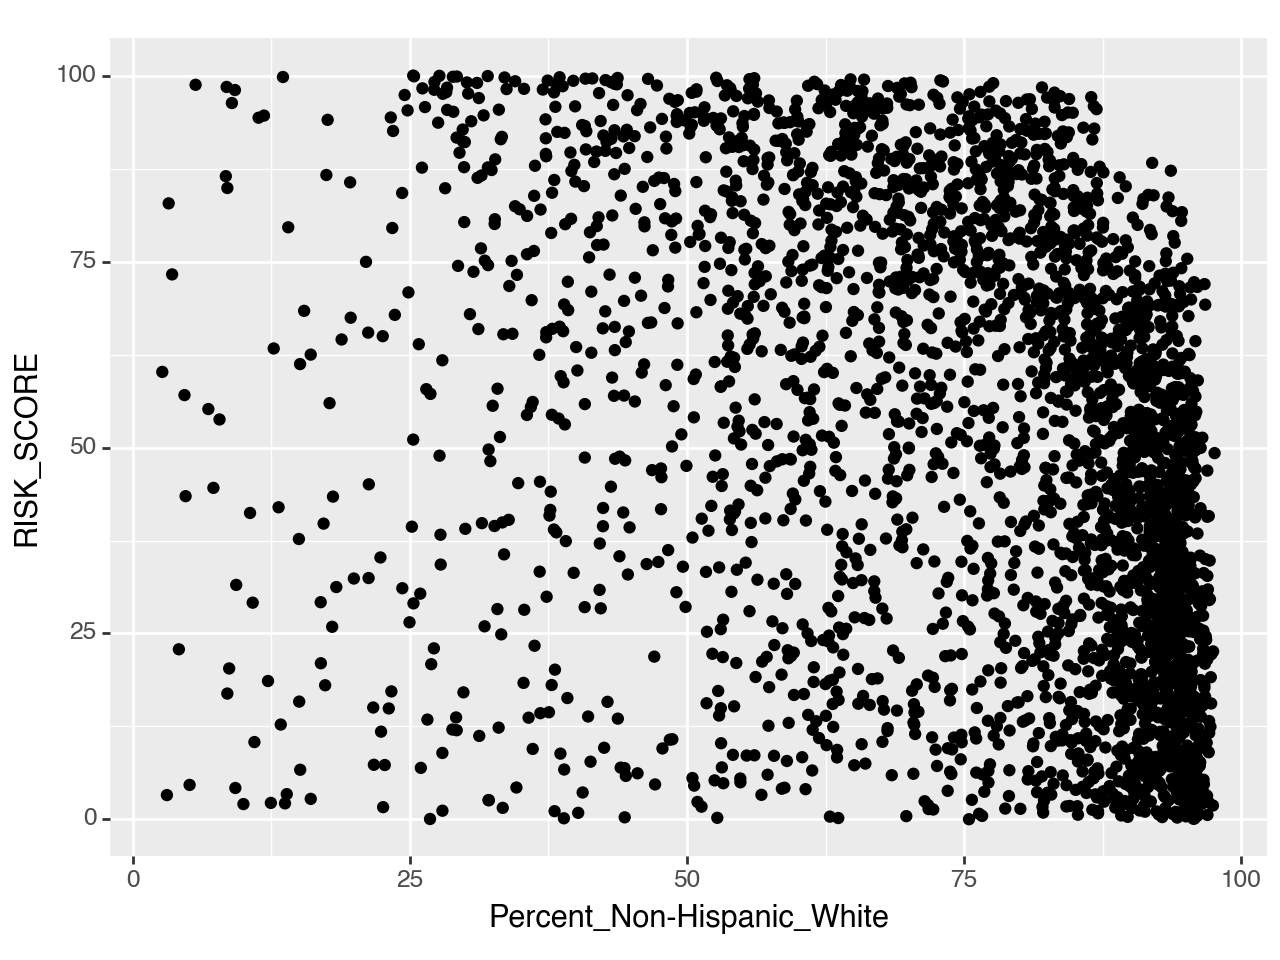

In [44]:
plot1 = (ggplot(Merged_County_Data) 
 + aes(x= "Percent_Non-Hispanic_White", y= "RISK_SCORE") 
 + geom_point())

print(plot1)

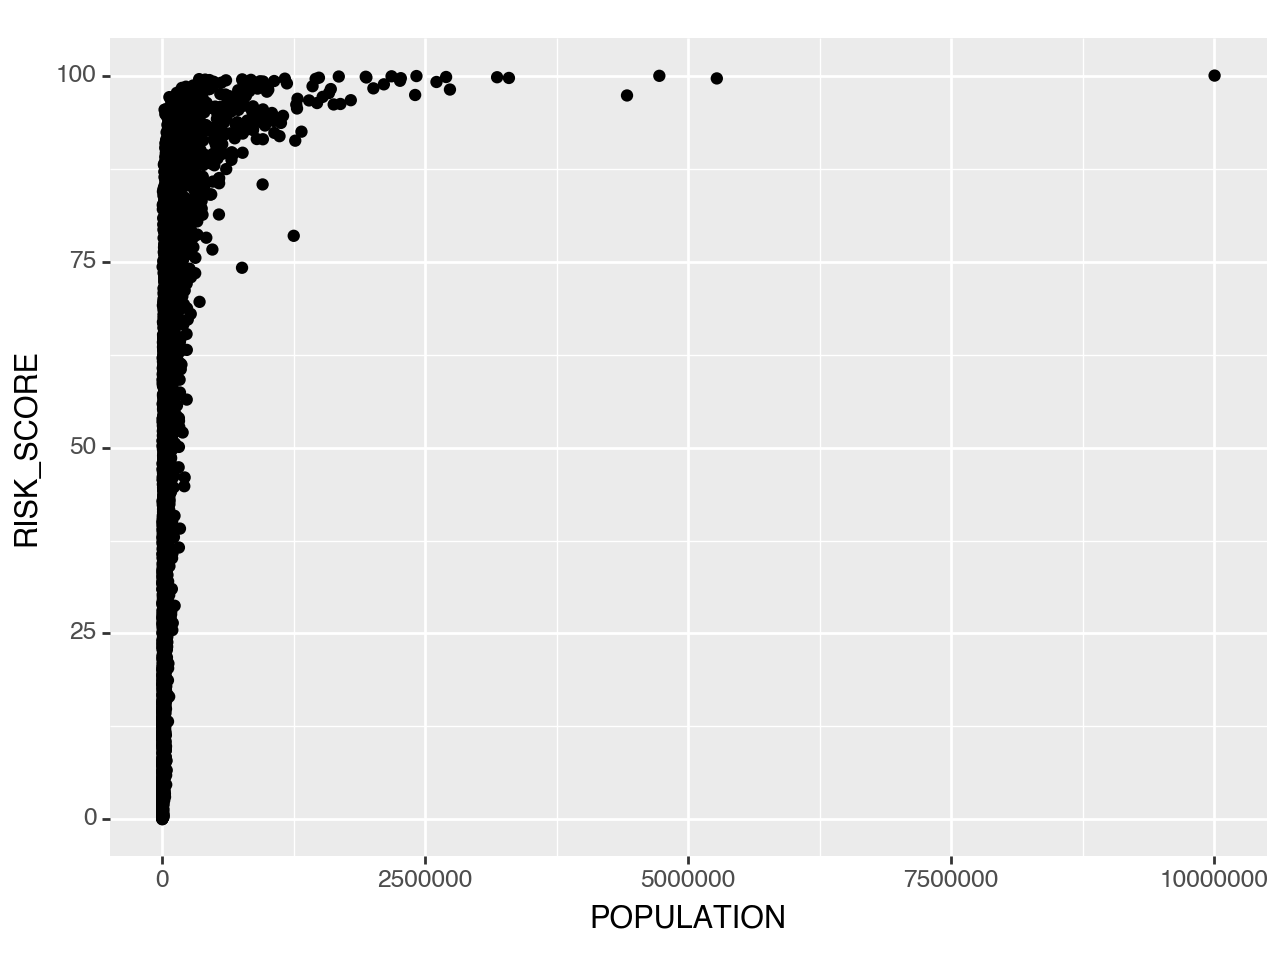

In [45]:
plot2 = (ggplot(Merged_County_Data_clean) 
 + aes(x= "POPULATION", y= "RISK_SCORE") 
 + geom_point())

print(plot2)

In [46]:
#KL - woah these are big counties
Merged_County_Data.sort_values("POPULATION", ascending = False).head(5)

STATEABBRV     FIPS  POPULATION         AREA  RISK_SCORE   EAL_SCORE  \
205          CA   6037.0  10005712.0  4797.383550  100.000000  100.000000   
611          IL  17031.0   5272775.0  1651.135984   99.618199   99.597648   
2624         TX  48201.0   4726200.0  1795.344568   99.968183   99.969050   
104          AZ   4013.0   4418836.0  9319.141753   97.327394   97.647787   
223          CA   6073.0   3295981.0  4571.491190   99.681833   99.690498   

            EAL_RATNG  SOVI_SCORE       SOVI_RATNG  RESL_SCORE  ...  \
205         Very High   85.839996        Very High   19.670000  ...   
611         Very High   80.040001        Very High   72.570000  ...   
2624        Very High   89.529999        Very High   12.730000  ...   
104   Relatively High   73.970001  Relatively High   29.850000  ...   
223         Very High   69.889999  Relatively High   17.030001  ...   

     Percent_Frequent_Physical_Distress  Percent_Frequent_Mental_Distress  \
205                                 9.9                              14.8   
611                                 8.5                              11.9   
2624                               11.0                              14.5   
104                                 9.5                              14.4   
223                                 9.1                              13.8   

      Percent_Less_than_18_Years_of_Age  Percent_65_and_Over  \
205                           21.070906            14.614289   
611                           21.484915            15.603387   
2624                          26.245646            11.360271   
104                           23.047920            15.773671   
223                           21.252475            14.884076   

      Percent_Non-Hispanic_White  Percent_Female Percent_Rural  \
205                    25.311988       50.447325      0.605218   
611                    41.471225       51.174508      0.045296   
2624                   27.671969       50.208247      1.213280   
104                    53.423440       50.295113      2.363800   
223                    43.750512       49.332713      3.297049   

                          Geolocation     County_State Community_Type  
205   POINT (-118.2618616 34.1963983)  Los Angeles, CA          Urban  
611    POINT (-87.6454546 41.8942937)         Cook, IL          Urban  
2624    POINT (-95.3930371 29.857273)       Harris, TX          Urban  
104   POINT (-112.4989296 33.3451756)     Maricopa, AZ          Urban  
223   POINT (-116.7761174 33.0236041)    San Diego, CA          Urban  

[5 rows x 39 columns]

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 161 rows containing missing values.


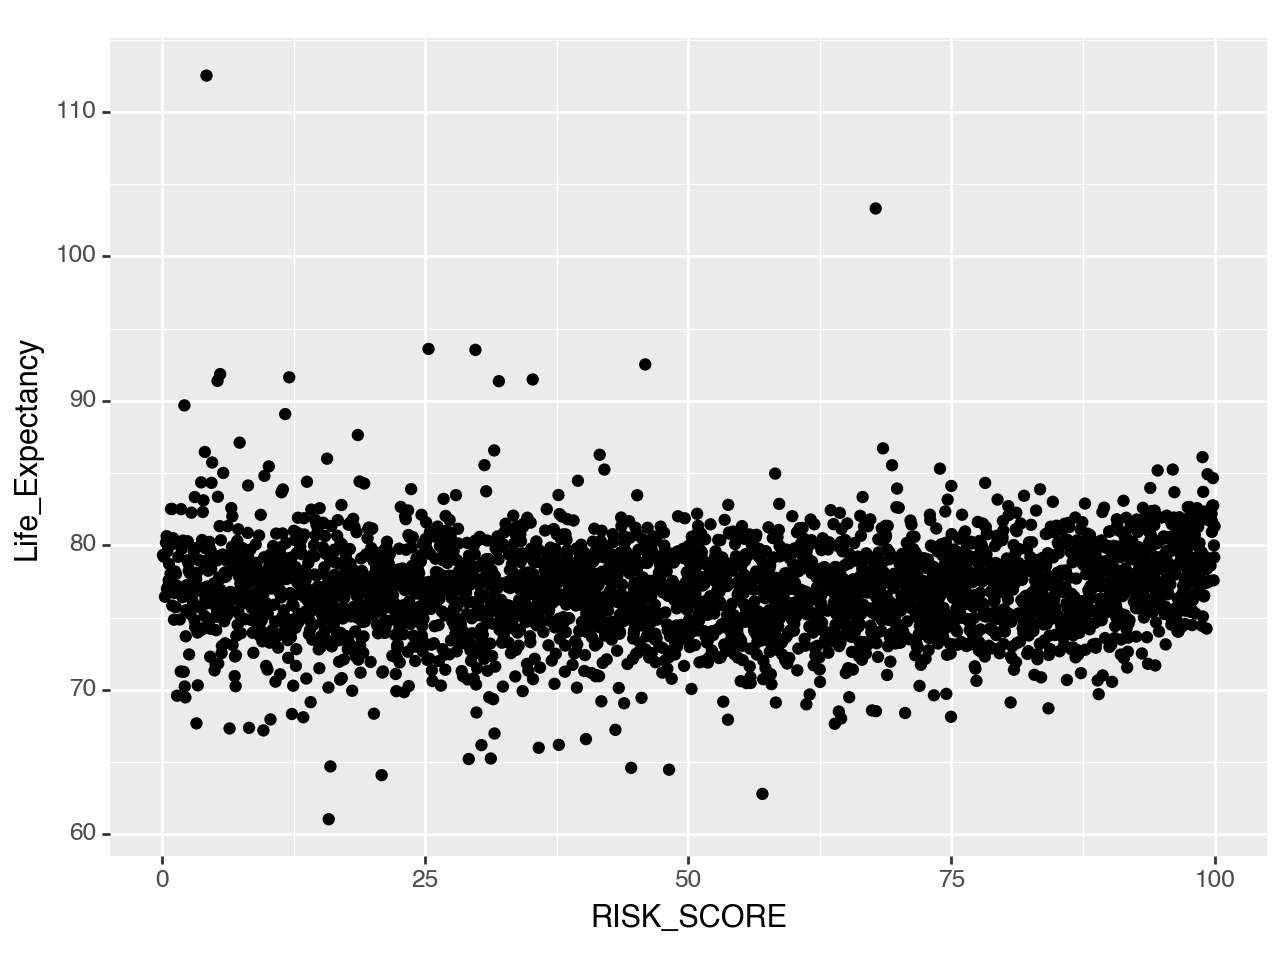

In [47]:
plot3 = (ggplot(Merged_County_Data) 
 + aes(x= "RISK_SCORE", y="Life_Expectancy") 
 + geom_point())

print(plot3)

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 92 rows containing missing values.


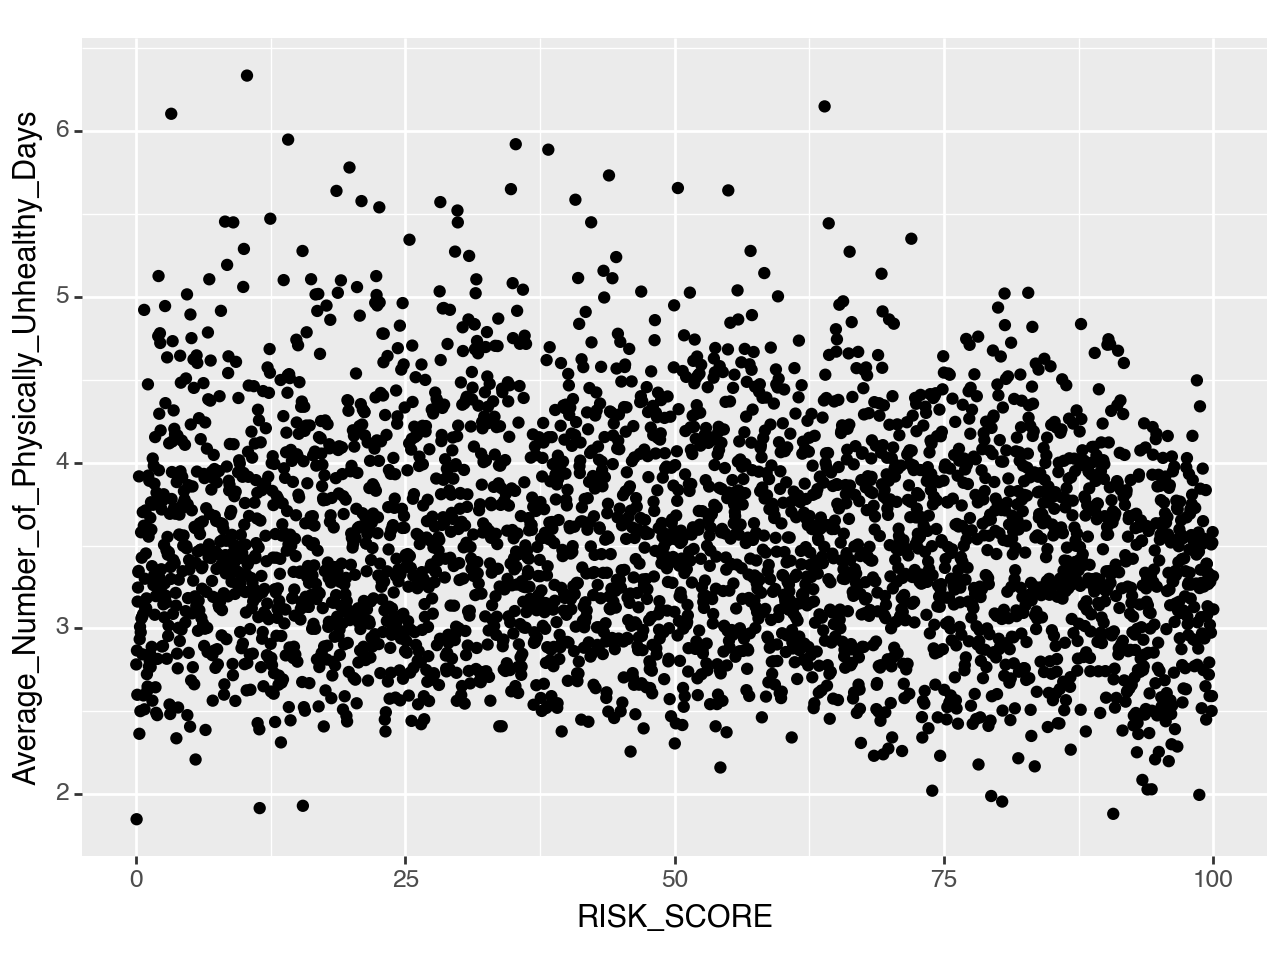

In [48]:
plot4 = (ggplot(Merged_County_Data) 
 + aes(x= "RISK_SCORE", y="Average_Number_of_Physically_Unhealthy_Days") 
 + geom_point())

print(plot4)



/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 92 rows containing missing values.


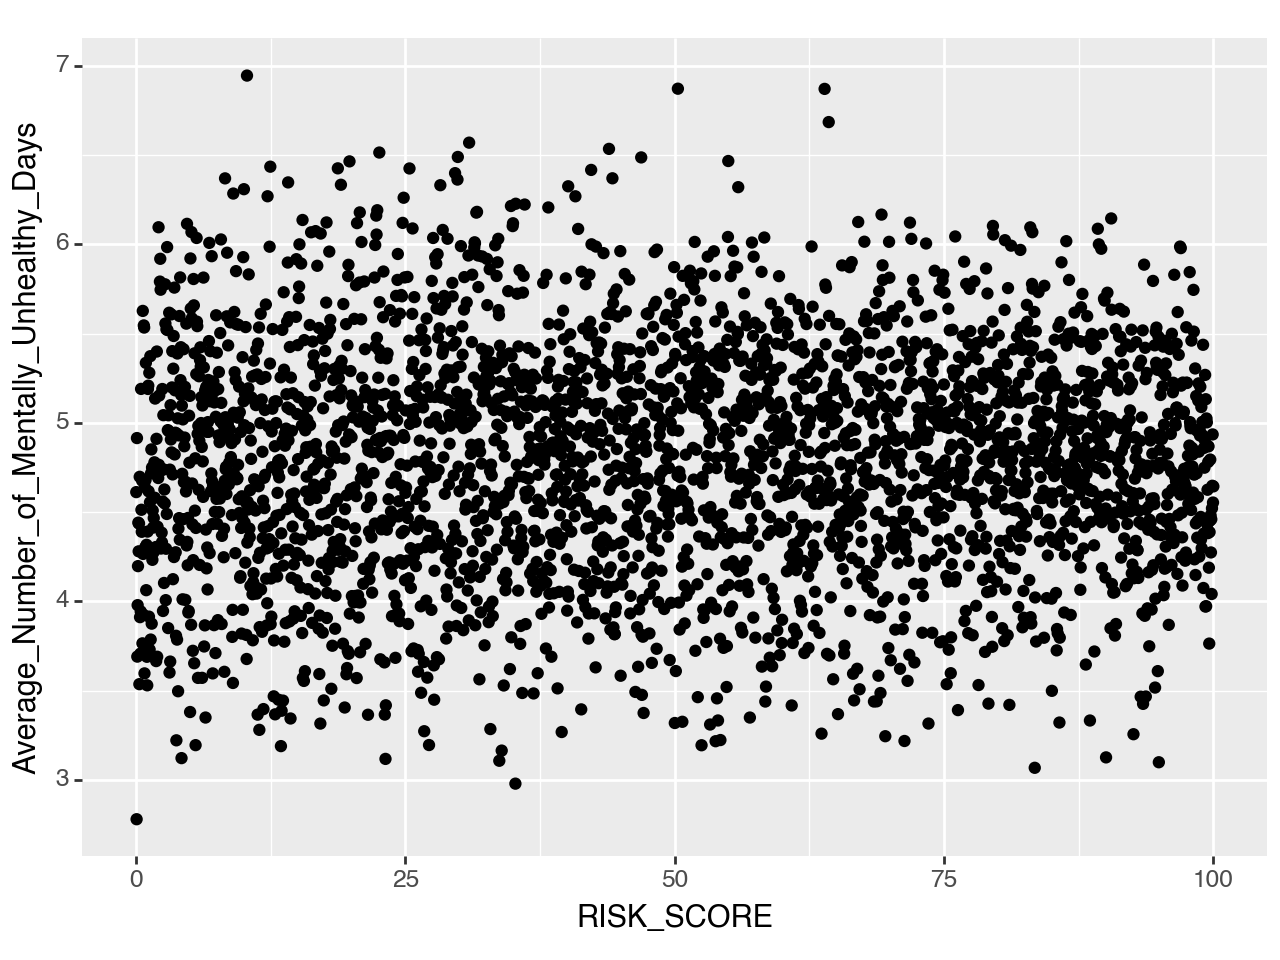

In [49]:
plot5 = (ggplot(Merged_County_Data) 
 + aes(x= "RISK_SCORE", y="Average_Number_of_Mentally_Unhealthy_Days") 
 + geom_point())

print(plot5)

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 151 rows containing missing values.


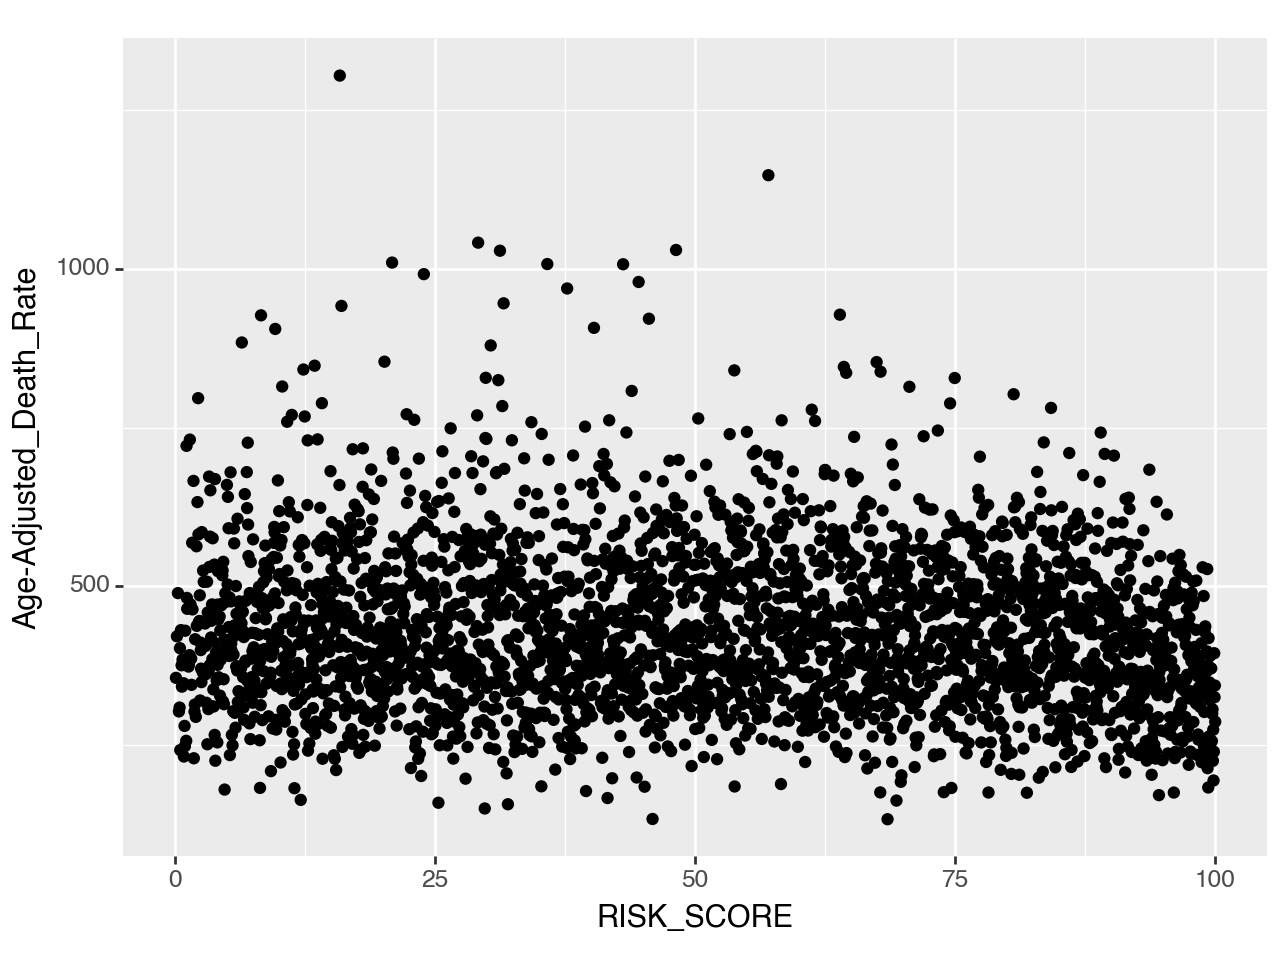

In [50]:
plot6 = (ggplot(Merged_County_Data) 
 + aes(x= "RISK_SCORE", y='Age-Adjusted_Death_Rate') 
 + geom_point())

print(plot6)



/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 9 rows containing missing values.


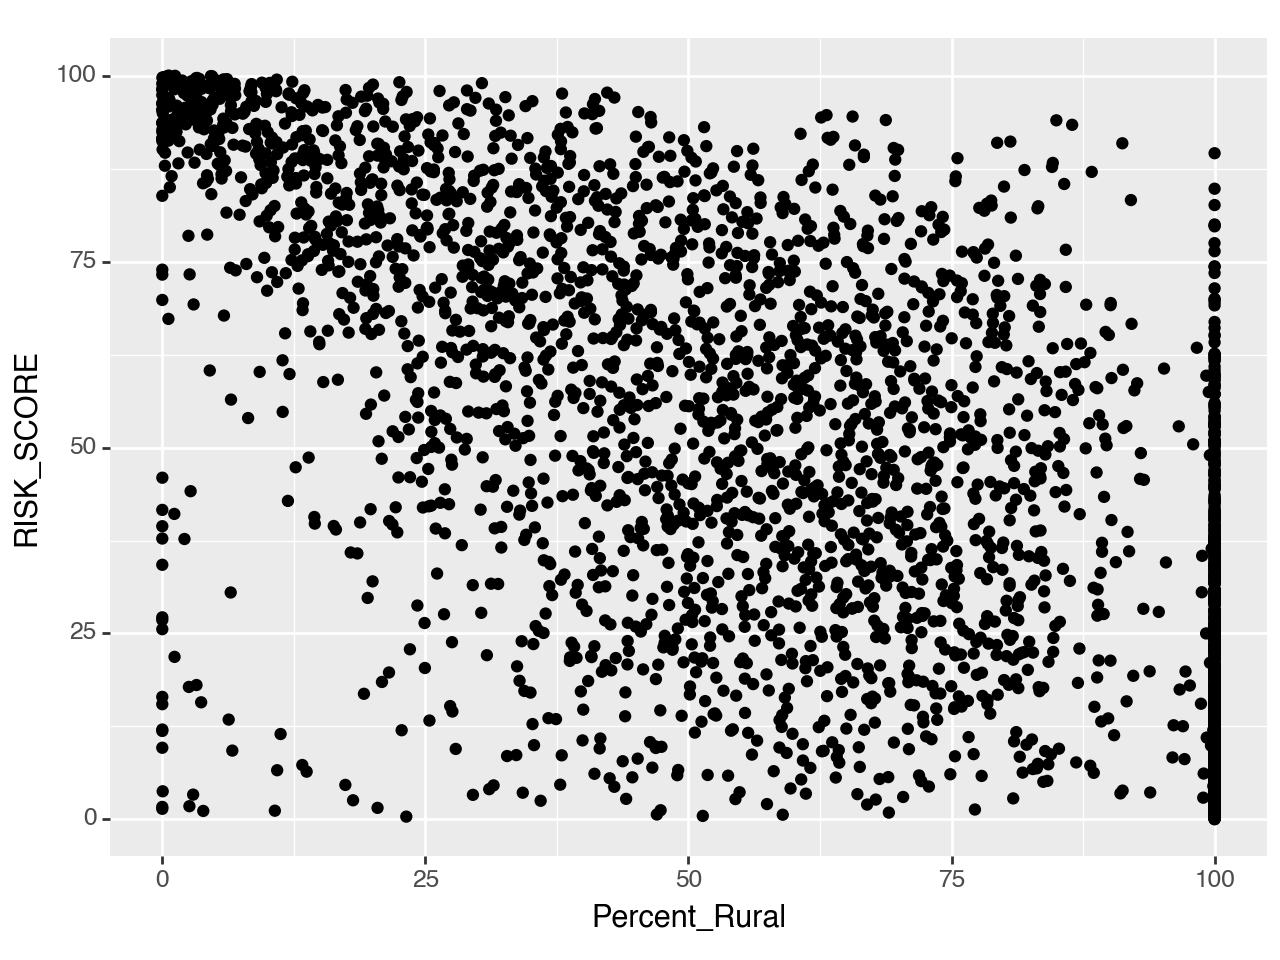

In [51]:
#county risk score versus percent rural

plot11 = (ggplot(Merged_County_Data_clean) 
 + aes(y= "RISK_SCORE", x='Percent_Rural') 
 + geom_point())

print(plot11)

In [52]:
Merged_County_Data_clean.sort_values("Percent_Rural", ascending = False).head(5)

STATEABBRV     FIPS  POPULATION         AREA  RISK_SCORE  EAL_SCORE  \
869          IA  19159.0      4653.0   544.305638   20.076360  22.717425   
2442         TN  47027.0      7571.0   261.962018   10.467706   8.016094   
2297         PA  42105.0     16396.0  1092.382878    4.199809   4.363974   
2786         UT  49017.0      5083.0  5260.781516   19.949093  19.158155   
1994         ND  38007.0       945.0  1164.757517    3.913458   5.416280   

     EAL_RATNG  SOVI_SCORE           SOVI_RATNG  RESL_SCORE  ...  \
869   Very Low   18.709999             Very Low   53.980000  ...   
2442  Very Low   64.769997      Relatively High    8.430000  ...   
2297  Very Low   48.029999  Relatively Moderate   63.240002  ...   
2786  Very Low   40.259998  Relatively Moderate   41.630001  ...   
1994  Very Low    5.790000             Very Low   61.650002  ...   

     Percent_Frequent_Mental_Distress  Percent_Less_than_18_Years_of_Age  \
869                              14.5                          22.569519   
2442                             19.7                          20.079418   
2297                             17.1                          20.314903   
2786                             15.3                          22.538507   
1994                             12.0                          20.732984   

      Percent_65_and_Over  Percent_Non-Hispanic_White  Percent_Female  \
869             23.927571                   94.524682       49.816771   
2442            25.175381                   94.070152       50.430179   
2297            25.093794                   96.026816       49.775509   
2786            23.825307                   88.165334       47.338663   
1994            24.397906                   91.204188       46.596859   

      Percent_Rural                      Geolocation  County_State  \
869           100.0   POINT (-94.2442514 40.7353342)  Ringgold, IA   
2442          100.0   POINT (-85.5457173 36.5457493)      Clay, TN   
2297          100.0   POINT (-77.8944358 41.7485866)    Potter, PA   
2786          100.0  POINT (-111.4509076 37.8316645)  Garfield, UT   
1994          100.0   POINT (-103.3640163 47.007044)  Billings, ND   

      Community_Type Population_Density  
869            Rural           8.548506  
2442           Rural          28.901136  
2297           Rural          15.009389  
2786           Rural           0.966206  
1994           Rural           0.811328  

[5 rows x 40 columns]

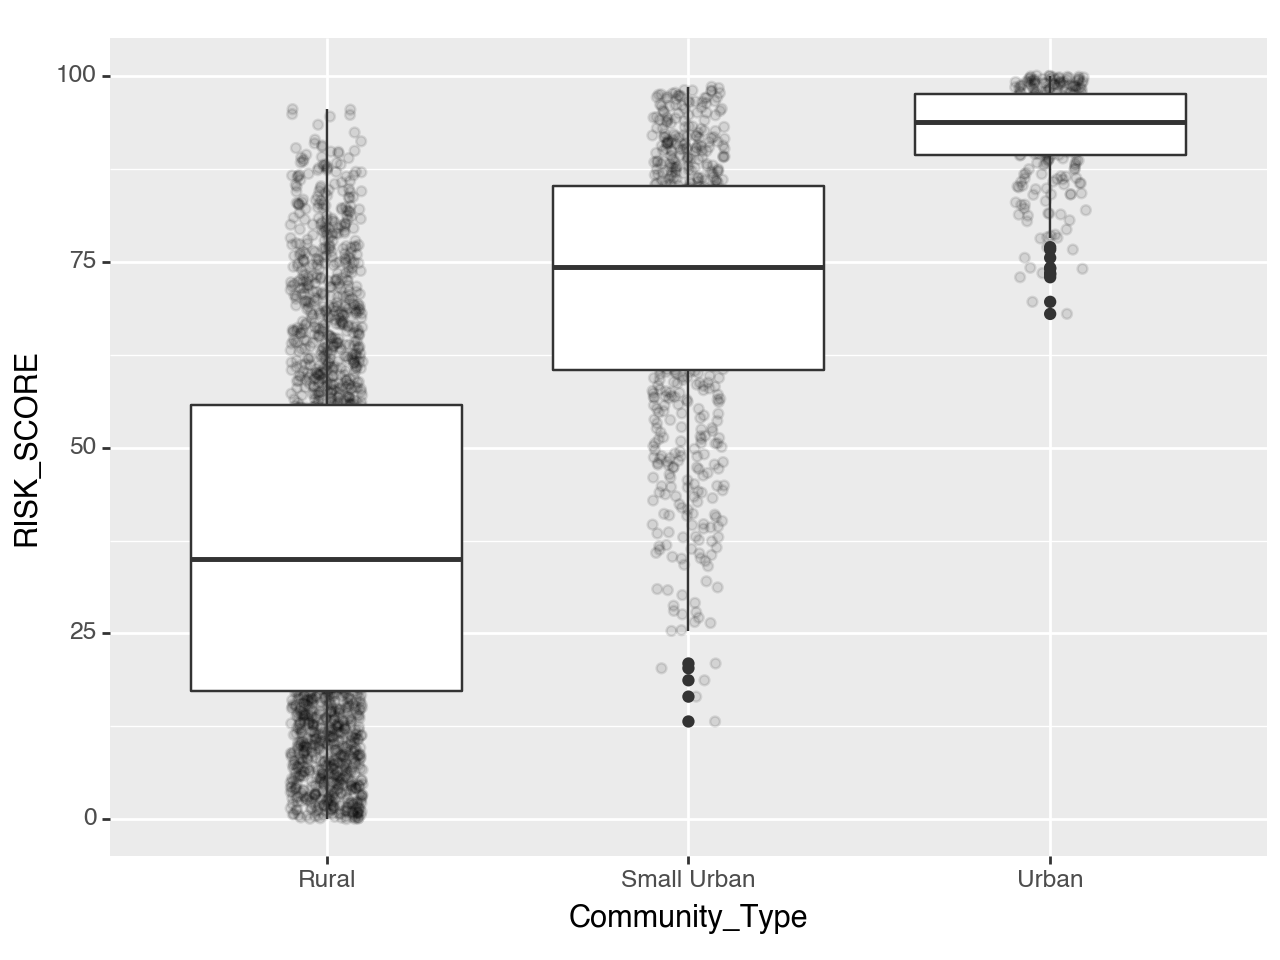

In [53]:
#plot community type and climate risk 
plot12 = (ggplot(Merged_County_Data_clean) 
 + aes(x= "Community_Type", y='RISK_SCORE') 
 + geom_jitter(width = .1,alpha=.1,show_legend=False)
 + geom_boxplot())

print(plot12)

In [54]:
Merged_County_Data_clean.loc[Merged_County_Data['Community_Type'] == 'Rural'].sort_values("RISK_SCORE", ascending = False).head(10)

STATEABBRV     FIPS  POPULATION         AREA  RISK_SCORE  EAL_SCORE  \
1918         NC  37055.0     36860.0  1557.298013   95.482024  95.666976   
192          CA   6011.0     21811.0  1168.027228   95.418390  93.964717   
197          CA   6021.0     28889.0  1340.372922   94.813872  94.026617   
1164         LA  22101.0     49313.0  1131.027710   94.718422  93.902816   
1897         NC  37013.0     44607.0   972.568215   94.495705  93.469514   
1921         NC  37061.0     48624.0   828.497933   93.382119  91.612504   
2212         OR  41007.0     41036.0  1094.535576   92.363983  91.736305   
26           AL   1053.0     36706.0   962.761819   91.377665  89.755494   
345          FL  12051.0     39371.0  1201.385234   91.154948  86.010523   
1899         NC  37017.0     29597.0   896.744081   90.900414  88.579387   

                EAL_RATNG  SOVI_SCORE           SOVI_RATNG  RESL_SCORE  ...  \
1918      Relatively High   27.719999       Relatively Low   99.589996  ...   
192   Relatively Moderate   76.419998      Relatively High   27.850000  ...   
197   Relatively Moderate   88.540001            Very High   22.410000  ...   
1164  Relatively Moderate   86.379997            Very High   78.129997  ...   
1897  Relatively Moderate   84.599998            Very High   55.380001  ...   
1921  Relatively Moderate   90.129997            Very High    8.340000  ...   
2212  Relatively Moderate   56.080002  Relatively Moderate   73.550003  ...   
26    Relatively Moderate   87.080002            Very High   20.590000  ...   
345   Relatively Moderate   99.589996            Very High    0.890000  ...   
1899  Relatively Moderate   87.650002            Very High   23.870001  ...   

     Percent_Frequent_Mental_Distress  Percent_Less_than_18_Years_of_Age  \
1918                             13.6                          18.516364   
192                              15.7                          26.659671   
197                              16.4                          26.804374   
1164                             18.7                          23.890778   
1897                             15.4                          19.575875   
1921                             15.8                          24.140987   
2212                             16.1                          18.258790   
26                               18.5                          22.613695   
345                              17.3                          26.730831   
1899                             16.3                          20.382727   

      Percent_65_and_Over  Percent_Non-Hispanic_White  Percent_Female  \
1918            23.367525                   86.948131       50.716438   
192             15.399005                   33.038281       48.952868   
197             16.684603                   49.109530       48.699878   
1164            18.120750                   56.045779       50.449909   
1897            25.044976                   65.793380       52.026176   
1921            19.699062                   50.446254       50.741008   
2212            24.161684                   84.448696       50.246353   
26              18.401046                   60.077931       49.480912   
345             13.717659                   29.796840       47.101431   
1899            23.495343                   54.574090       52.535140   

      Percent_Rural                      Geolocation  County_State  \
1918      28.959316   POINT (-75.7675364 35.6062688)      Dare, NC   
192       31.724170  POINT (-122.2375629 39.1777385)    Colusa, CA   
197       40.871915  POINT (-122.4016998 39.6025462)     Glenn, CA   
1164      13.039341   POINT (-91.4638037 29.6293488)  St. Mary, LA   
1897      65.600201   POINT (-76.8420144 35.4823128)  Beaufort, NC   
1921      86.464405   POINT (-77.9335434 34.9344033)    Duplin, NC   
2212      38.972434  POINT (-123.7050366 46.0245094)   Clatsop, OR   
26        63.511574   POINT (-87.1684097 31.1222867)  Escambia, AL   
345       37.892182    POIN

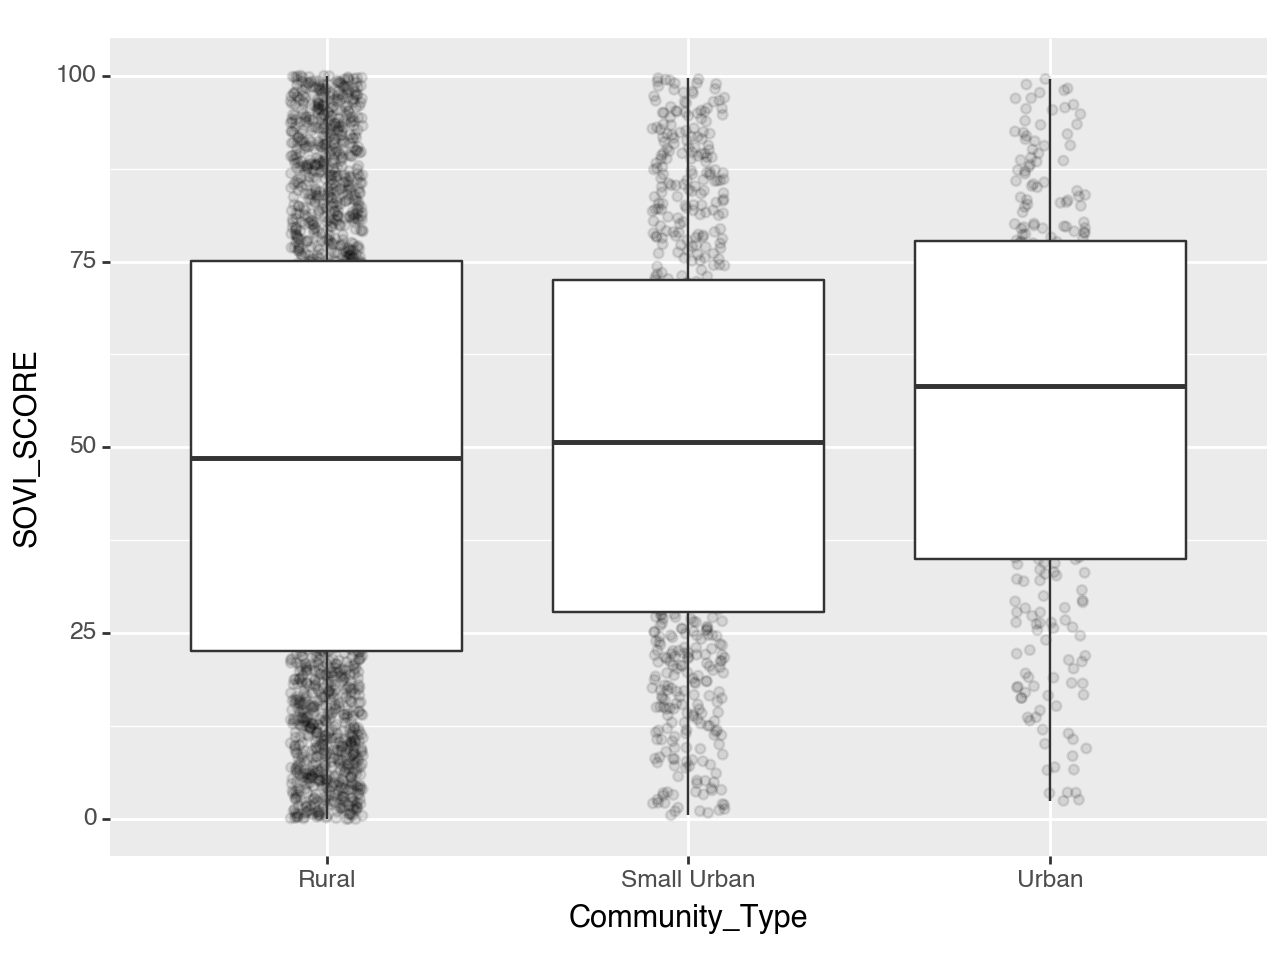

In [55]:
#social vulnerability score and community type
plot13 = (ggplot(Merged_County_Data_clean) 
 + aes(x= "Community_Type", y='SOVI_SCORE') 
 + geom_jitter(width = .1,alpha=.1,show_legend=False)
 + geom_boxplot())

print(plot13)

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 9 rows containing missing values.


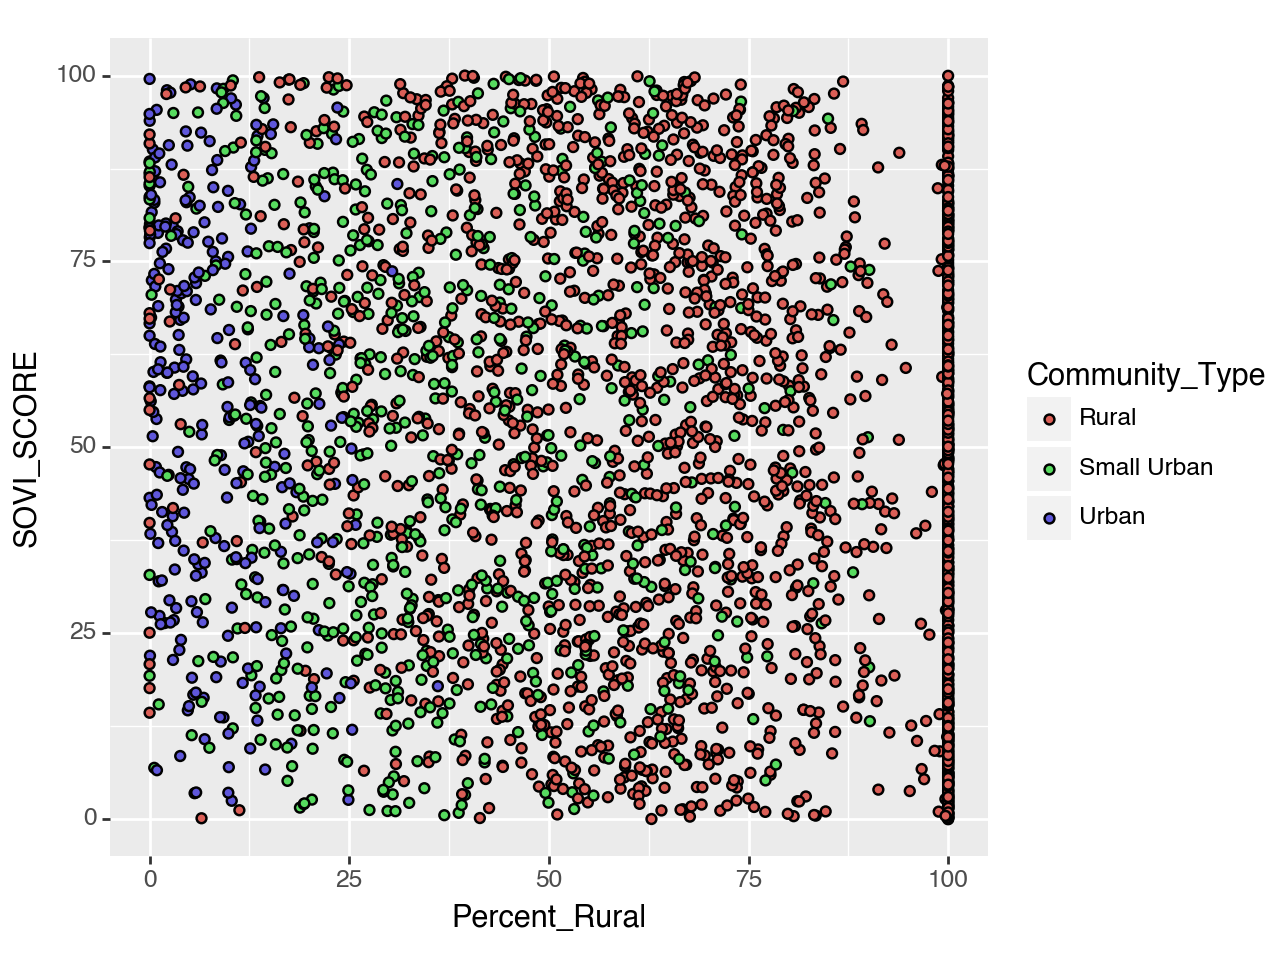

In [56]:
plot14 = (ggplot(Merged_County_Data_clean) 
 + aes(y= "SOVI_SCORE", x='Percent_Rural', fill = "Community_Type") 
 + geom_point())

print(plot14)

#KL - what are the small/medium metro areas that are more than 75% rural??

In [57]:
Merged_County_Data_clean.loc[Merged_County_Data['Community_Type'] == 'Small/Medium Urban'].sort_values("Percent_Rural", ascending = False).head(5)

Empty DataFrame
Columns: [STATEABBRV, FIPS, POPULATION, AREA, RISK_SCORE, EAL_SCORE, EAL_RATNG, SOVI_SCORE, SOVI_RATNG, RESL_SCORE, RESL_RATNG, Percent_Fair_or_Poor_Health, Average_Number_of_Physically_Unhealthy_Days, Average_Number_of_Mentally_Unhealthy_Days, Number_Primary_Care_Physicians, Primary_Care_Physicians_Rate, Primary_Care_Physicians_Ratio, Number_Dentists, Dentist_Rate, Dentist_Ratio, Number_Mental_Health_Providers, Mental_Health_Provider_Rate, Mental_Health_Provider_Ratio, Average_Daily_PM2.5, Presence_of_Water_Violation, State, County, Life_Expectancy, Age-Adjusted_Death_Rate, Percent_Frequent_Physical_Distress, Percent_Frequent_Mental_Distress, Percent_Less_than_18_Years_of_Age, Percent_65_and_Over, Percent_Non-Hispanic_White, Percent_Female, Percent_Rural, Geolocation, County_State, Community_Type, Population_Density]
Index: []

[0 rows x 40 columns]

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 62 rows containing missing values.


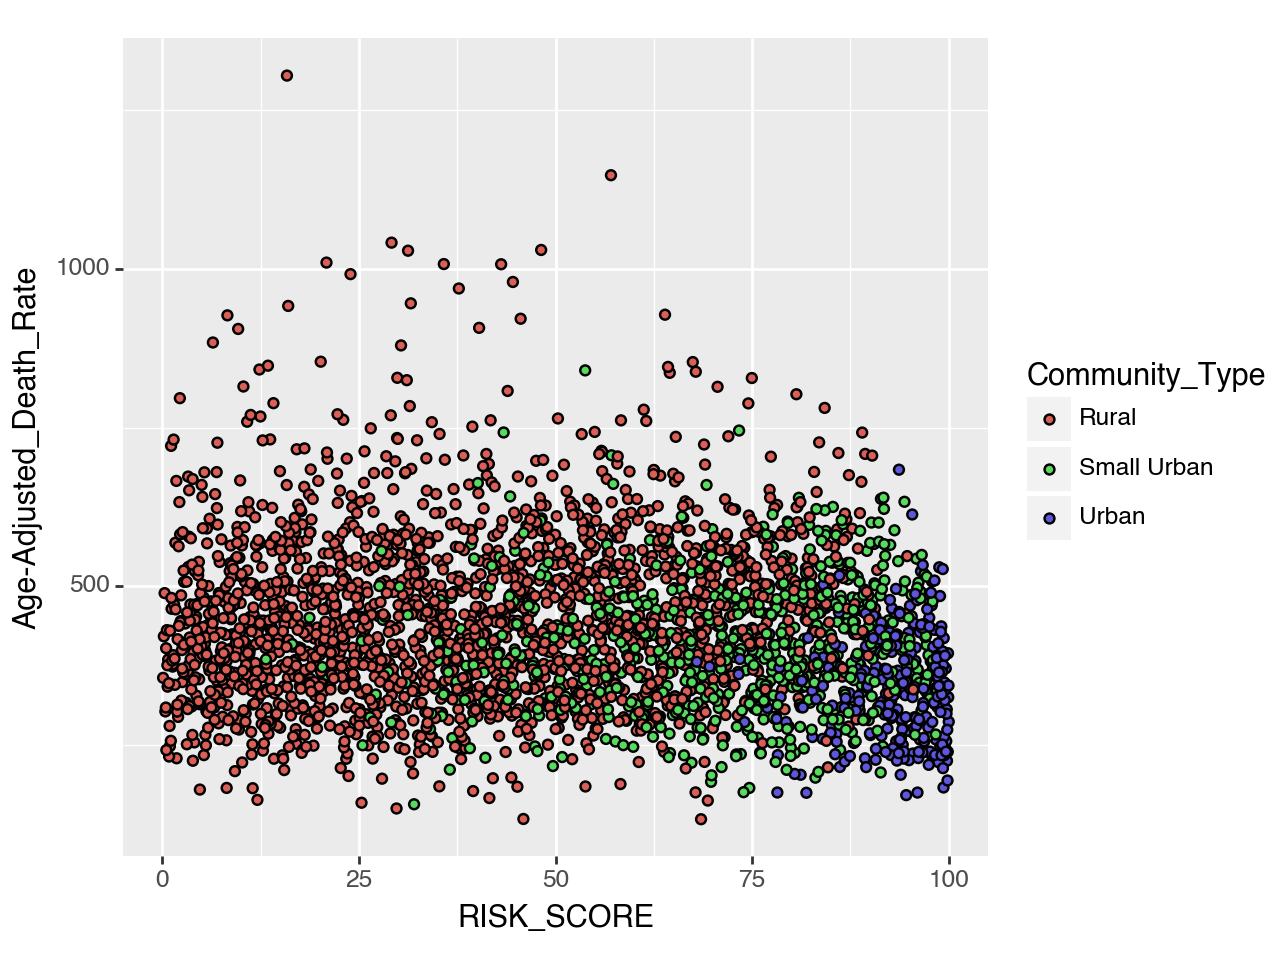

In [58]:
plot15 = (ggplot(Merged_County_Data_clean) 
 + aes(x= "RISK_SCORE", y='Age-Adjusted_Death_Rate', fill = "Community_Type") 
 + geom_point())

print(plot15)

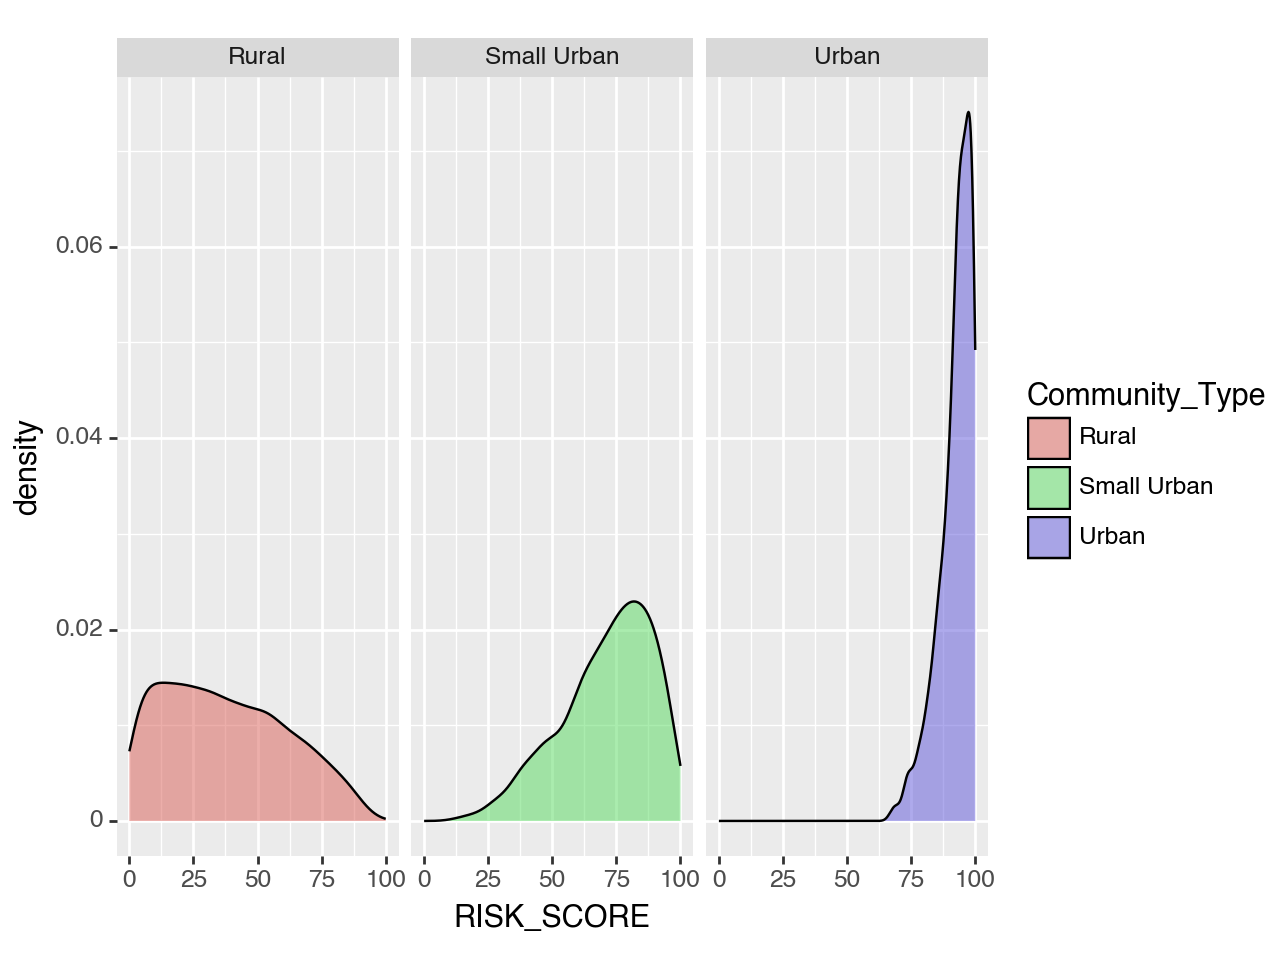

<Figure Size: (640 x 480)>

In [59]:
(ggplot(Merged_County_Data_clean, aes(x = 'RISK_SCORE', fill="Community_Type")) +
  geom_density(color="black",alpha=.5)+
  xlim(0,100) +
  facet_grid(" ~ Community_Type"))

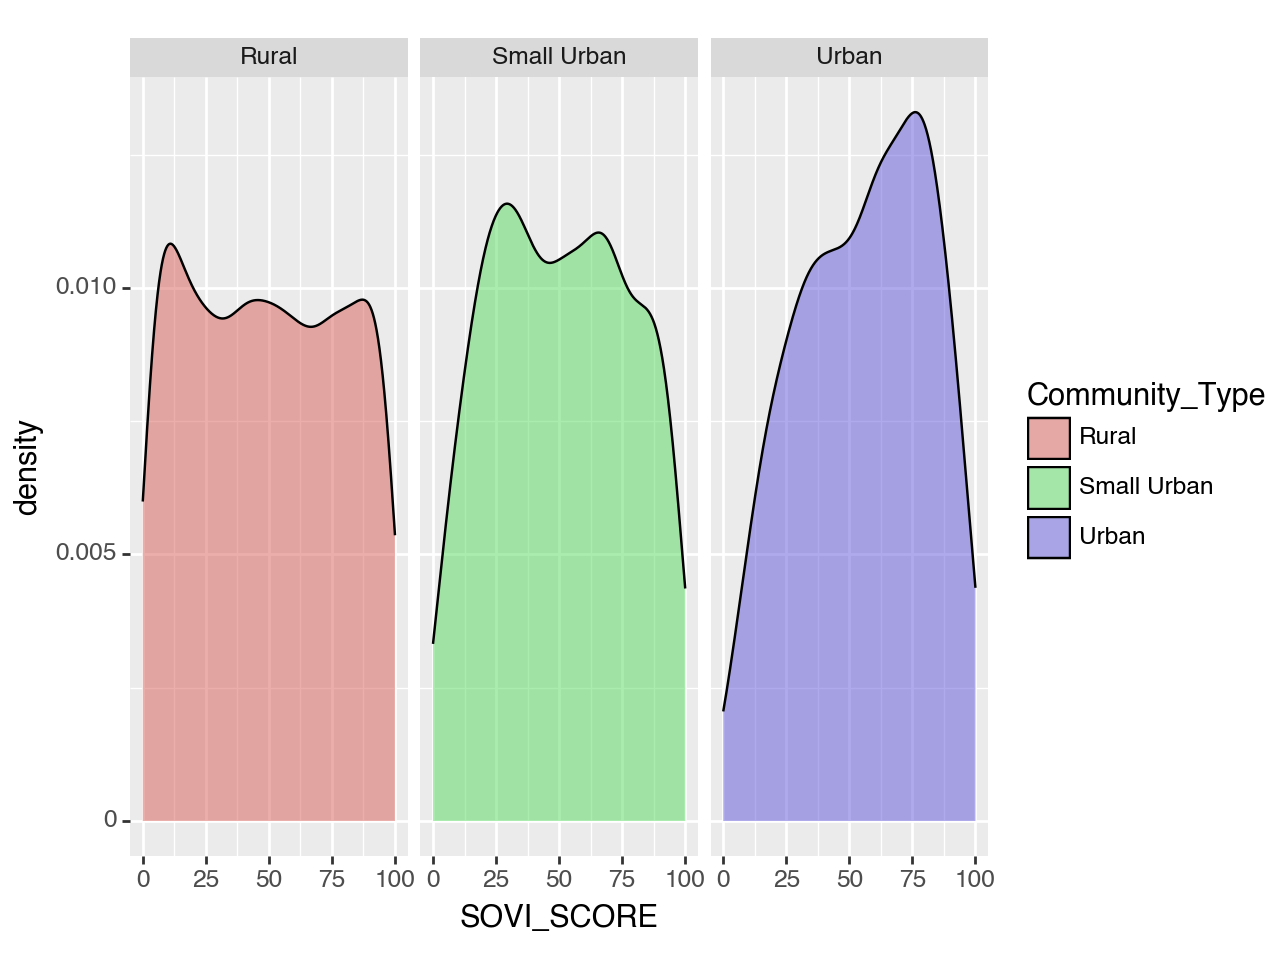

<Figure Size: (640 x 480)>

In [60]:
(ggplot(Merged_County_Data_clean, aes(x = 'SOVI_SCORE', fill="Community_Type")) +
  geom_density(color="black",alpha=.5)+
  xlim(0,100) +
  facet_grid(" ~ Community_Type"))

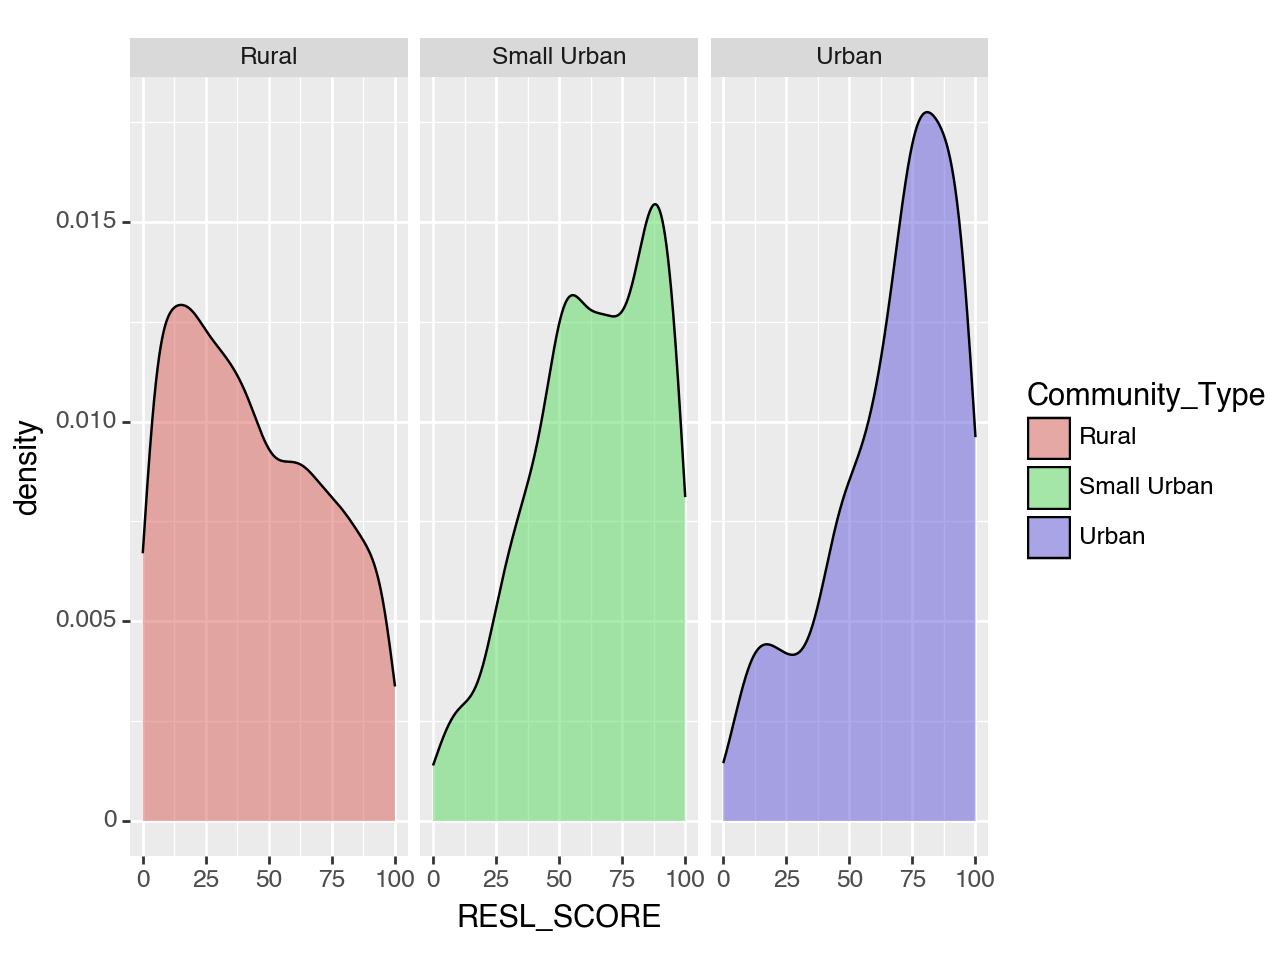

<Figure Size: (640 x 480)>

In [61]:
(ggplot(Merged_County_Data_clean, aes(x = 'RESL_SCORE', fill="Community_Type")) +
  geom_density(color="black",alpha=.5)+
  xlim(0,100) +
  facet_grid(" ~ Community_Type"))

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


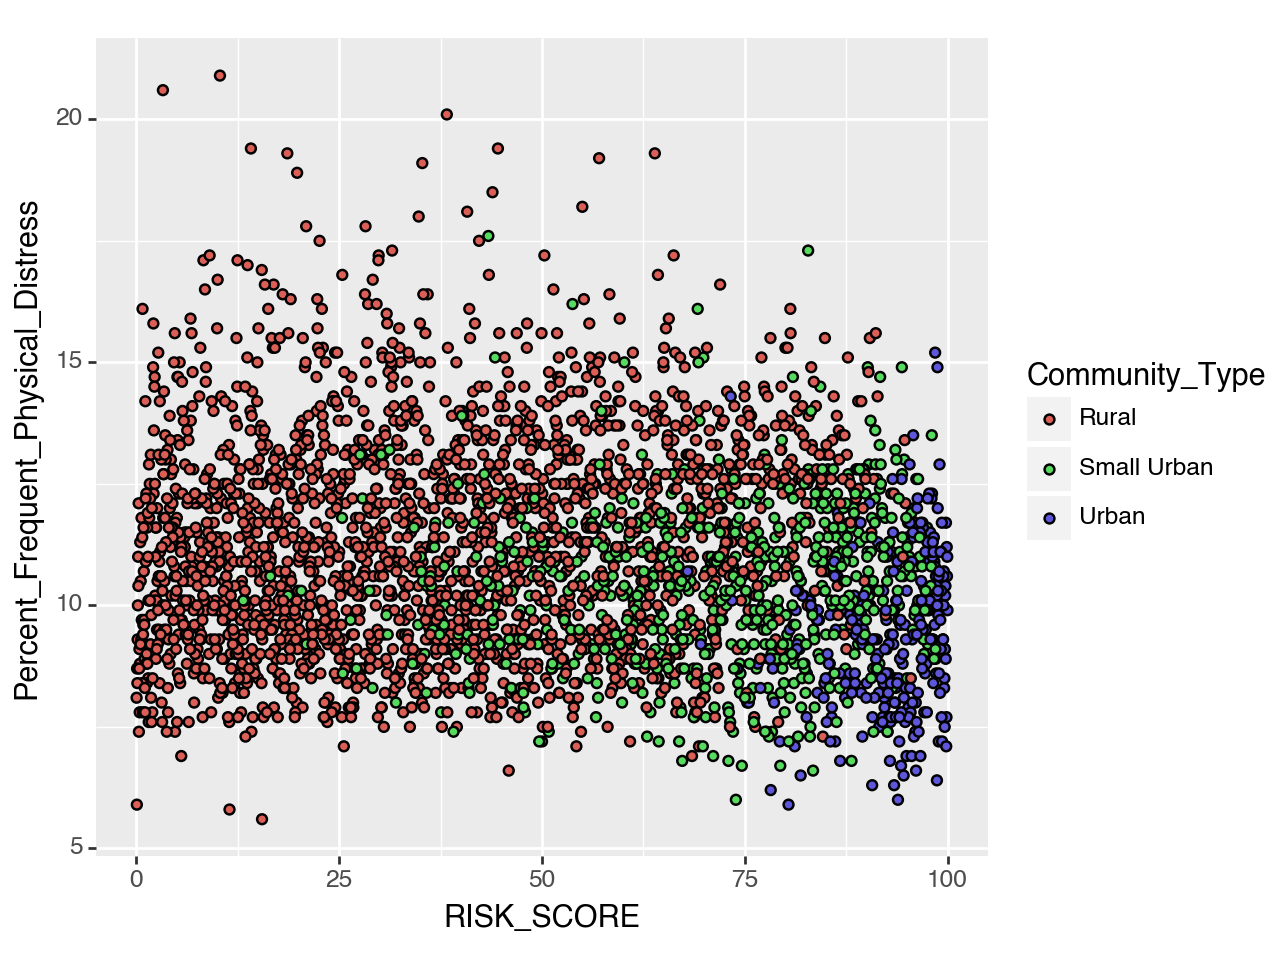

In [62]:
plot17 = (ggplot(Merged_County_Data_clean) 
 + aes(x= "RISK_SCORE", y='Percent_Frequent_Physical_Distress', fill = "Community_Type") 
 + geom_point())

print(plot17)

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 3 rows containing missing values.


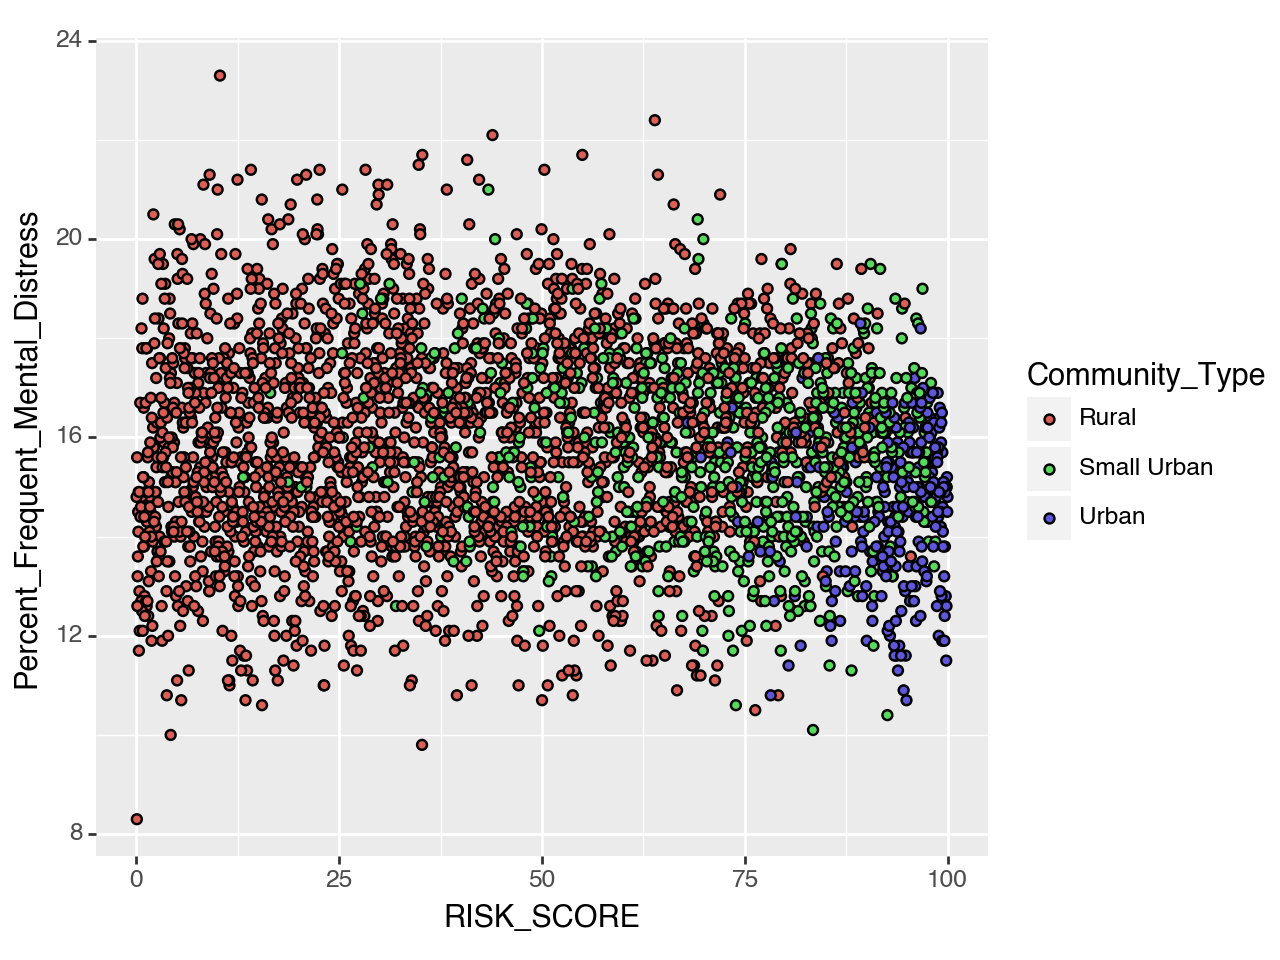

In [63]:
plot18 = (ggplot(Merged_County_Data_clean) 
 + aes(x= "RISK_SCORE", y='Percent_Frequent_Mental_Distress', fill = "Community_Type") 
 + geom_point())

print(plot18)

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 3 rows containing non-finite values.
/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_jitter : Removed 3 rows containing missing values.


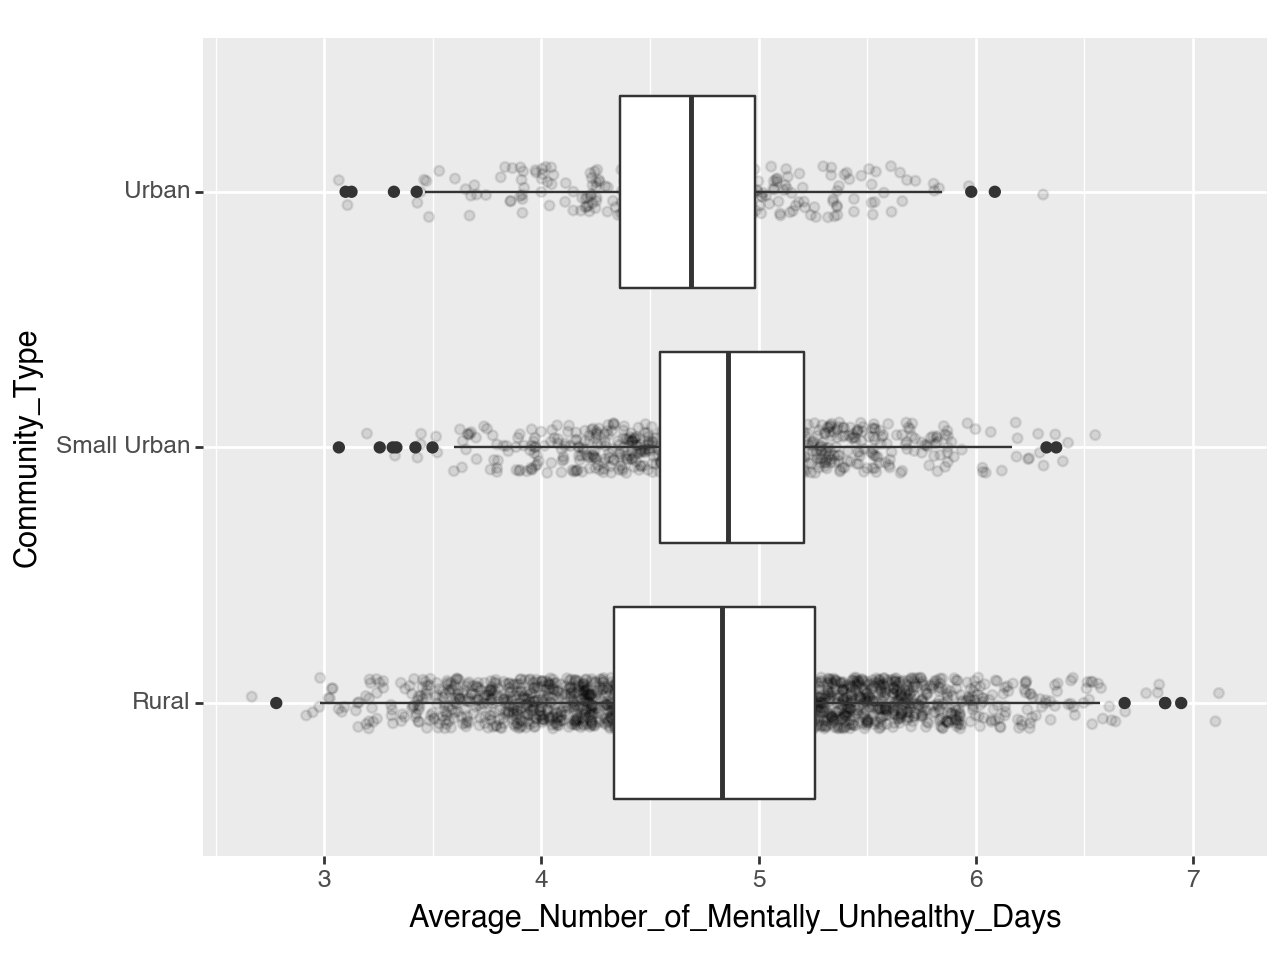

In [64]:
plot19 = (ggplot(Merged_County_Data_clean) 
 + aes(x= "Community_Type", y='Average_Number_of_Mentally_Unhealthy_Days') 
 + geom_jitter(width = .1,alpha=.1,show_legend=False)
 + geom_boxplot()
 + coord_flip())

print(plot19)

/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_boxplot : Removed 3 rows containing non-finite values.
/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_jitter : Removed 3 rows containing missing values.


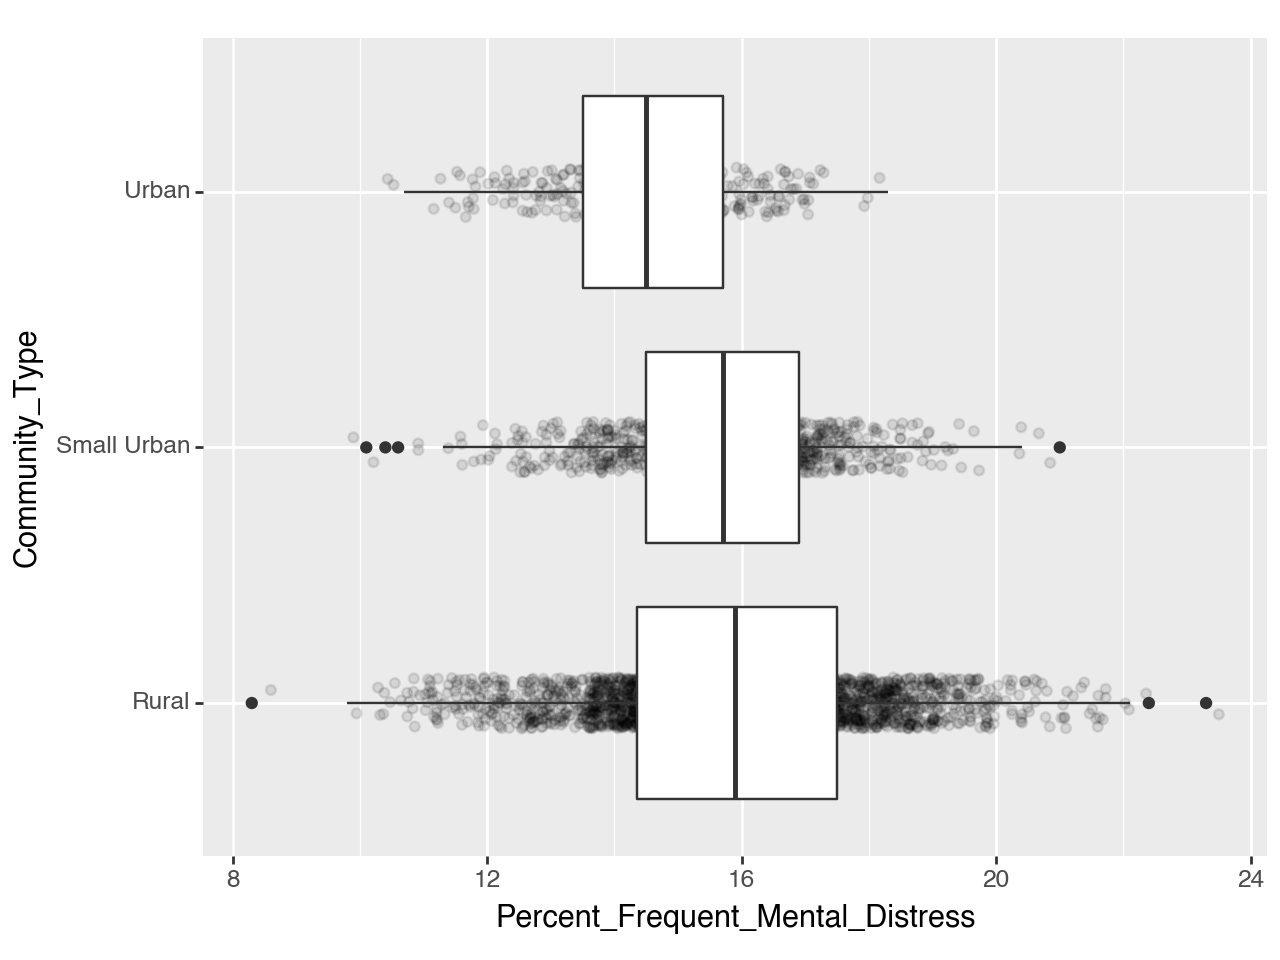

<Figure Size: (640 x 480)>

In [65]:
(ggplot(Merged_County_Data_clean) 
 + aes(x= "Community_Type", y='Percent_Frequent_Mental_Distress') 
 + geom_jitter(width = .1,alpha=.1,show_legend=False)
 + geom_boxplot()
 + coord_flip())


/Users/katharynloweth/anaconda3/lib/python3.10/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 28 rows containing missing values.


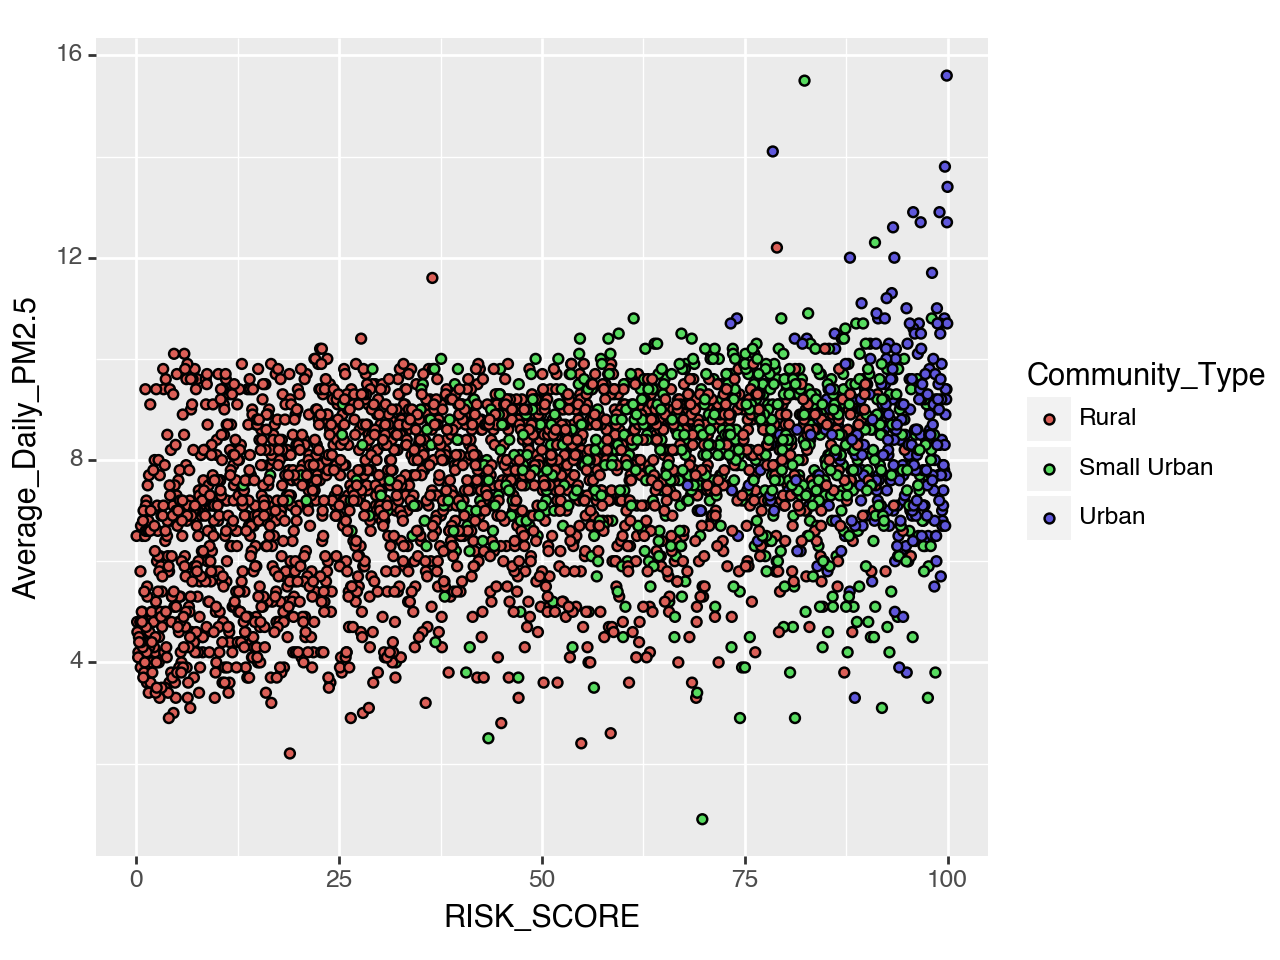

<Figure Size: (640 x 480)>

In [66]:
#air pollution particulate matter
(ggplot(Merged_County_Data_clean) 
 + aes(x= "RISK_SCORE", y='Average_Daily_PM2.5', fill = "Community_Type") 
 + geom_point())


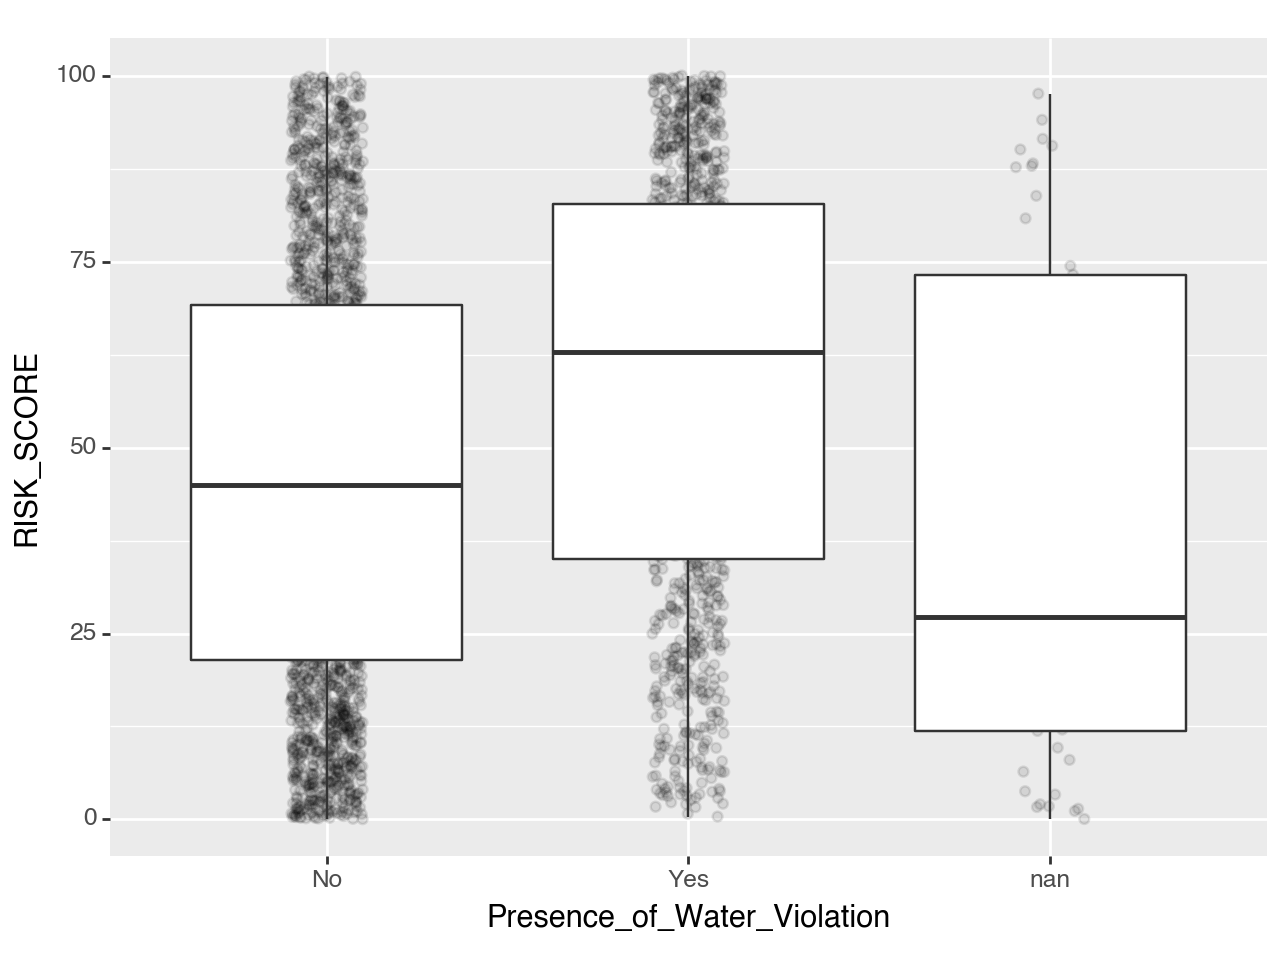

<Figure Size: (640 x 480)>

In [67]:
(ggplot(Merged_County_Data_clean) 
 + aes(y= "RISK_SCORE", x='Presence_of_Water_Violation') 
 + geom_jitter(width = .1,alpha=.1,show_legend=False)
 + geom_boxplot())

### Further Cleaning and Plotting

In [69]:
print(Merged_County_Data_clean.columns)

Index(['STATEABBRV', 'FIPS', 'POPULATION', 'AREA', 'RISK_SCORE', 'EAL_SCORE',
       'EAL_RATNG', 'SOVI_SCORE', 'SOVI_RATNG', 'RESL_SCORE', 'RESL_RATNG',
       'Percent_Fair_or_Poor_Health',
       'Average_Number_of_Physically_Unhealthy_Days',
       'Average_Number_of_Mentally_Unhealthy_Days',
       'Number_Primary_Care_Physicians', 'Primary_Care_Physicians_Rate',
       'Primary_Care_Physicians_Ratio', 'Number_Dentists', 'Dentist_Rate',
       'Dentist_Ratio', 'Number_Mental_Health_Providers',
       'Mental_Health_Provider_Rate', 'Mental_Health_Provider_Ratio',
       'Average_Daily_PM2.5', 'Presence_of_Water_Violation', 'State', 'County',
       'Life_Expectancy', 'Age-Adjusted_Death_Rate',
       'Percent_Frequent_Physical_Distress',
       'Percent_Frequent_Mental_Distress', 'Percent_Less_than_18_Years_of_Age',
       'Percent_65_and_Over', 'Percent_Non-Hispanic_White', 'Percent_Female',
       'Percent_Rural', 'Geolocation', 'County_State', 'Community_Type',
       'Populatio

### Plotting Exploration with Density and Rural

In [ ]:
plot20 = (ggplot(Merged_County_Data_clean) 
 + aes(x= "Population_Density", y= "RISK_SCORE") 
 + geom_point())

print(plot20)

In [ ]:
plot21 = (ggplot(Merged_County_Data_clean) 
 + aes(y= "Population_Density", x='RISK_SCORE', fill = "Community_Type") 
 + geom_point())

print(plot21)

In [ ]:
# maybe we can filter some urban density outliers?

In [ ]:
# just to see
no_density_outliers = Merged_County_Data_clean[Merged_County_Data_clean['Population_Density'] < 20000]

In [ ]:
plot22 = (ggplot(no_density_outliers) 
 + aes(x= "Population_Density", y="Average_Number_of_Mentally_Unhealthy_Days") 
 + geom_point())

print(plot22)

In [ ]:
# without outliers

plot23 = (ggplot(no_density_outliers) 
 + aes(x= "Population_Density", y='Age-Adjusted_Death_Rate', fill = "Community_Type") 
 + geom_point())

print(plot23)

In [ ]:
(ggplot(no_density_outliers) 
 + aes(y= "Population_Density", x='Age-Adjusted_Death_Rate', fill = "Community_Type") 
 + geom_point())

In [ ]:
(ggplot(Merged_County_Data_clean, aes(x = 'RISK_SCORE', fill="Community_Type")) +
  geom_density(color="black",alpha=.5)+
  xlim(0,100) +
  facet_grid(" ~ Community_Type"))

# Reordering Columns and Saving Dataset to Repository

In [ ]:
# Reorder columns

# Specify the desired column order
column_order = ['FIPS', 'STATEABBRV', 'State', 'County', 'County_State', 'Community_Type', 'POPULATION', 
                'AREA',
                'Population_Density','Percent_Rural', 'RISK_SCORE', 'RISK_RATNG',
       'EAL_SCORE', 'EAL_RATNG', 'SOVI_SCORE', 'SOVI_RATNG', 'RESL_SCORE',
       'RESL_RATNG', 'Percent_Fair_or_Poor_Health',
       'Average_Number_of_Physically_Unhealthy_Days',
       'Average_Number_of_Mentally_Unhealthy_Days',
       'Number_Primary_Care_Physicians', 'Primary_Care_Physicians_Rate',
       'Primary_Care_Physicians_Ratio', 'Number_Dentists', 'Dentist_Rate',
       'Dentist_Ratio', 'Number_Mental_Health_Providers',
       'Mental_Health_Provider_Rate', 'Mental_Health_Provider_Ratio',
       'Average_Daily_PM2.5', 'Presence_of_Water_Violation', 
       'Life_Expectancy', 'Age-Adjusted_Death_Rate',
       'Percent_Frequent_Physical_Distress',
       'Percent_Frequent_Mental_Distress',
       'Percent_Less_than_18_Years_of_Age', 'Percent_65_and_Over',
       'Percent_Non-Hispanic_White', 'Percent_Female',
       'Geolocation']

# Reorder the columns in the original DataFrame
Merged_County_Data_clean = Merged_County_Data_clean[column_order]

# reordered dataframe
Merged_County_Data_clean.head()


In [ ]:
#saving dataset